# Complete Practice Notebook with all codes for Time Series & Sequential Data Analytics Lab

Code credits: [**Mudit Golchha**](https://github.com/mudit2004)

### All Packages

In [300]:
import seaborn as sns
import numpy as np
from numpy import polyfit
from random import random
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import Grouper
from pandas import to_datetime
from pandas.plotting import lag_plot
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.stattools import adfuller , acf , pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.regression.rolling import RollingOLS
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model 
import statsmodels.api as sm
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

import warnings
warnings.filterwarnings('ignore')


### EXP 1 ( `EDA` )

In [3]:
series = pd.read_csv(r'/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/daily_total_female_births_in_cal.csv', header=0, parse_dates=[0],index_col=0)

In [4]:
series

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]

In [5]:
series.index = pd.to_datetime(series.index)
series.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [6]:
january_data = series[series.index.month == 1]
print(january_data)

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
1959-01-06      29
1959-01-07      45
1959-01-08      43
1959-01-09      38
1959-01-10      27
1959-01-11      38
1959-01-12      33
1959-01-13      55
1959-01-14      47
1959-01-15      45
1959-01-16      37
1959-01-17      50
1959-01-18      43
1959-01-19      41
1959-01-20      52
1959-01-21      34
1959-01-22      53
1959-01-23      39
1959-01-24      32
1959-01-25      37
1959-01-26      43
1959-01-27      39
1959-01-28      35
1959-01-29      44
1959-01-30      38
1959-01-31      24


In [7]:
year_1959 = series[series.index.year == 1959]
print(year_1959)

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]


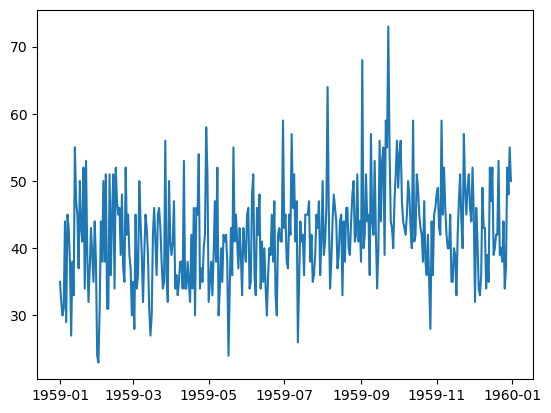

In [8]:
plt.plot(series)
plt.show()

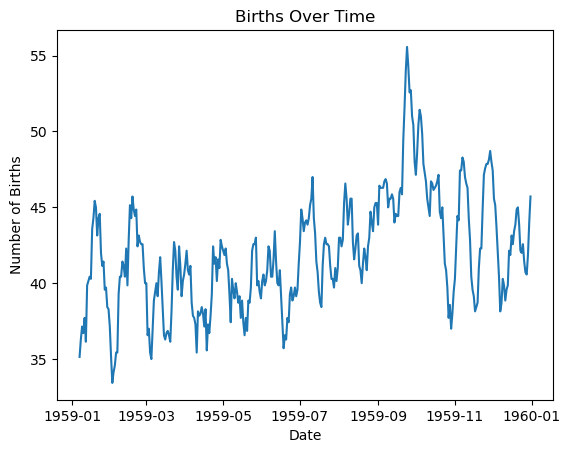

In [10]:
smoothed_series = series.rolling(window=7).mean()
plt.plot(smoothed_series)
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.title('Births Over Time')
plt.show()

### EXP - 2 ( `Lag` )

In [12]:
series = read_csv(r'/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/Daily_Min_Temp.csv', header=0, index_col=0)
series.head()

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

In [18]:
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t-1', 't']
print("Positive Lag")
print(dataframe.head(5))

Positive Lag
    t-1     t
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


In [19]:
temps = DataFrame(series.values)
df = concat([temps.shift(-1), temps], axis=1)
df.columns = ['t+1', 't']
print("Neagtive Lag")
print(df.head(5))

Neagtive Lag
    t+1     t
0  17.9  20.7
1  18.8  17.9
2  14.6  18.8
3  15.8  14.6
4  15.8  15.8


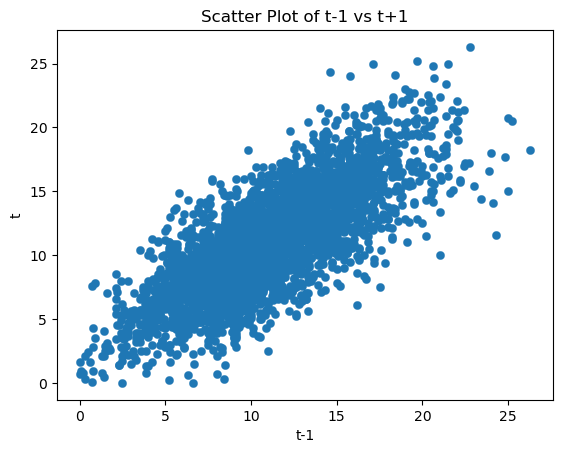

In [21]:
colors = np.arange(len(dataframe)) 
plt.scatter(dataframe['t-1'], dataframe['t'], linewidth=0.2)
plt.xlabel('t-1')
plt.ylabel('t')
plt.title('Scatter Plot of t-1 vs t+1')
plt.show()

In [27]:
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-3', 't-2', 't-1', 't']
print(f'{dataframe.head}')


<bound method NDFrame.head of        t-3   t-2   t-1     t
0      NaN   NaN   NaN  20.7
1      NaN   NaN  20.7  17.9
2      NaN  20.7  17.9  18.8
3     20.7  17.9  18.8  14.6
4     17.9  18.8  14.6  15.8
...    ...   ...   ...   ...
3645  10.0  12.9  14.6  14.0
3646  12.9  14.6  14.0  13.6
3647  14.6  14.0  13.6  13.5
3648  14.0  13.6  13.5  15.7
3649  13.6  13.5  15.7  13.0

[3650 rows x 4 columns]>


In [28]:
shifted = temps.shift(1) # Has t-1 lag values
means = shifted.rolling(window=2).mean() #rolling the values by taking two elemnet at a time and taking the mean
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-2,t-1)', 't']
print(dataframe.head(5))

   mean(t-2,t-1)     t
0            NaN  20.7
1            NaN  17.9
2          19.30  18.8
3          18.35  14.6
4          16.70  15.8


In [30]:
width = 3 # Window size
shifted = temps.shift(width - 1) # Lag 2 ( t-2 )
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't']
print(dataframe.head(20))

     min       mean   max     t
0    NaN        NaN   NaN  20.7
1    NaN        NaN   NaN  17.9
2    NaN        NaN   NaN  18.8
3    NaN        NaN   NaN  14.6
4   17.9  19.133333  20.7  15.8
5   14.6  17.100000  18.8  15.8
6   14.6  16.400000  18.8  15.8
7   14.6  15.400000  15.8  17.4
8   15.8  15.800000  15.8  21.8
9   15.8  16.333333  17.4  20.0
10  15.8  18.333333  21.8  16.2
11  17.4  19.733333  21.8  13.3
12  16.2  19.333333  21.8  16.7
13  13.3  16.500000  20.0  21.5
14  13.3  15.400000  16.7  25.0
15  13.3  17.166667  21.5  20.7
16  16.7  21.066667  25.0  20.6
17  20.7  22.400000  25.0  24.8
18  20.6  22.100000  25.0  17.7
19  20.6  22.033333  24.8  15.5


In [34]:
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


### EXP - 3 ( `line`, `scatter`, and `autocorrelation` plots )

In [37]:
series = read_csv(r'/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/Daily_Min_Temp.csv' , header = 0 , index_col = 0 , parse_dates = True ).squeeze()
series

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

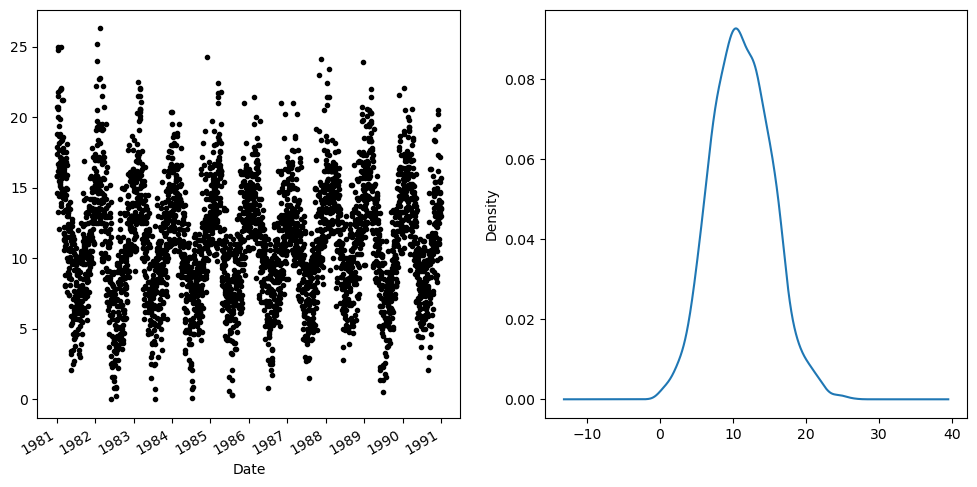

In [43]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
series.plot(style = 'k.')

plt.subplot(1,2,2)
series.plot(kind='kde')

plt.show()

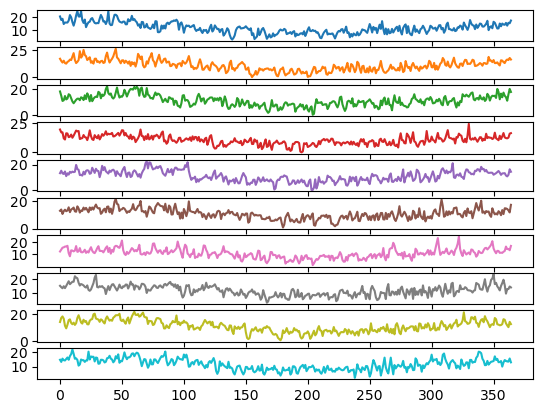

In [57]:
groups = series.groupby(Grouper(freq = 'A')) #'A' -> which stands for annual
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.show()

In [58]:
years

1981  1982  1983  1984  1985  1986  1987  1988  1989  1990
0    20.7  17.0  18.4  19.5  13.3  12.9  12.3  15.3  14.3  14.8
1    17.9  15.0  15.0  17.1  15.2  13.8  13.8  14.3  17.4  13.3
2    18.8  13.5  10.9  17.1  13.1  10.6  15.3  13.5  18.5  15.6
3    14.6  15.2  11.4  12.0  12.7  12.6  15.6  15.0  16.8  14.5
4    15.8  13.0  14.8  11.0  14.6  13.7  16.2  13.6  11.5  14.3
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
360  15.5  15.3  13.9  12.2  11.5  14.6  16.2   9.5  13.3  14.0
361  13.3  16.3  11.1  12.0  10.8  14.2  14.2  12.9  11.7  13.6
362  15.6  15.8  16.1  12.6  12.0  13.2  14.3  12.9  10.4  13.5
363  15.2  17.7  20.4  16.0  16.3  11.7  13.3  14.8  14.4  15.7
364  17.4  16.3  18.0  16.4  14.4  17.2  16.7  14.1  12.7  13.0

[365 rows x 10 columns]

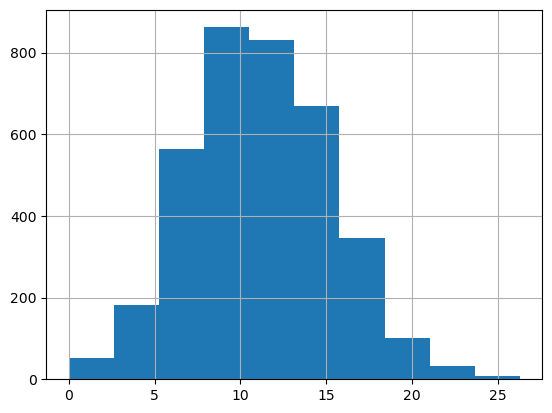

In [60]:
series.hist()
plt.show()

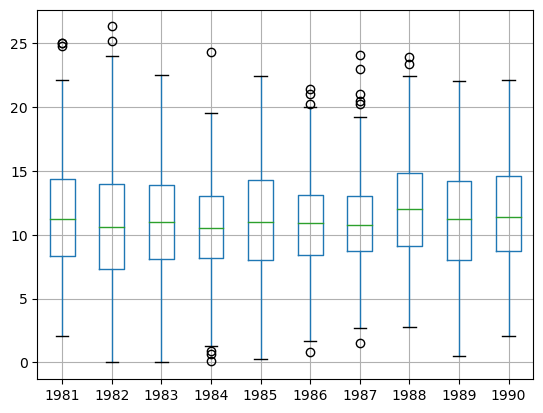

In [63]:
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()      # Box and Whisker plots
plt.show()

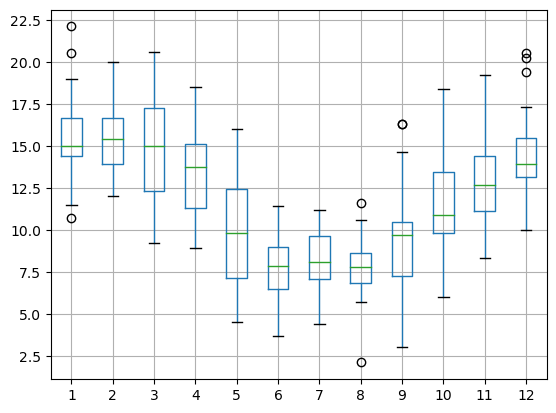

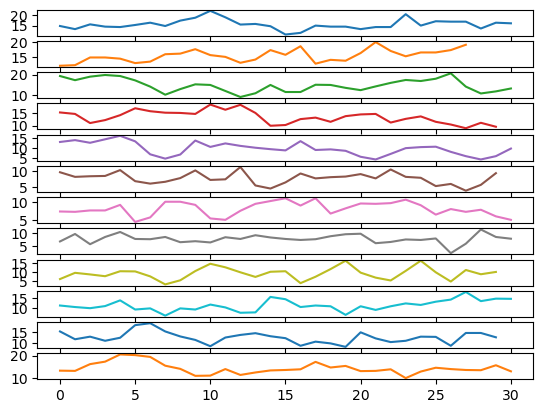

In [65]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
months.plot(subplots=True, legend=False)
plt.show()

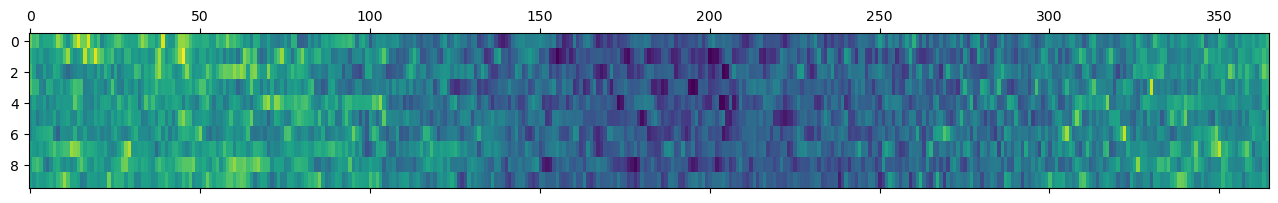

In [68]:
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
plt.matshow(years, aspect = 'auto')      # Heat Map
plt.show()

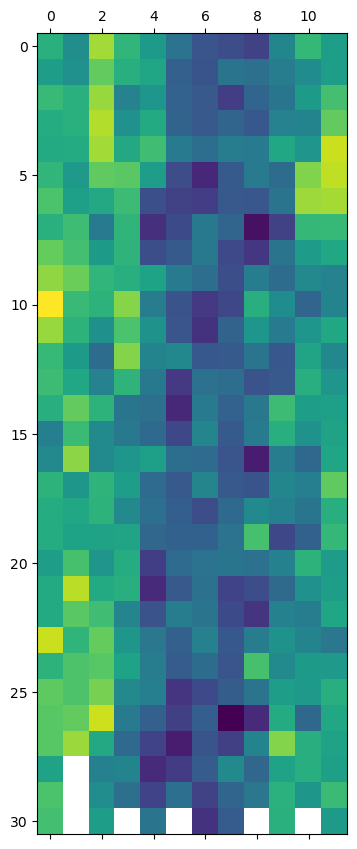

In [69]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

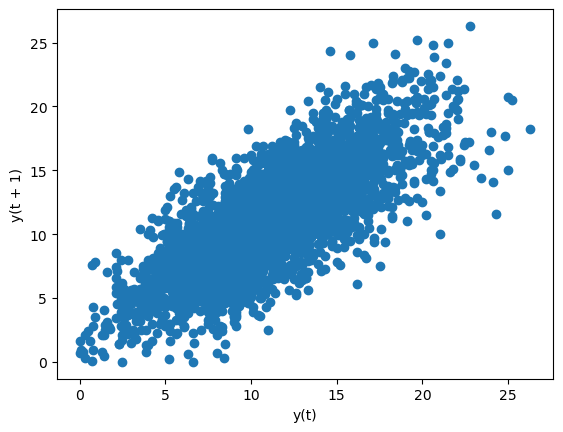

In [70]:
lag_plot(series)  # Lag Scatter
plt.show()

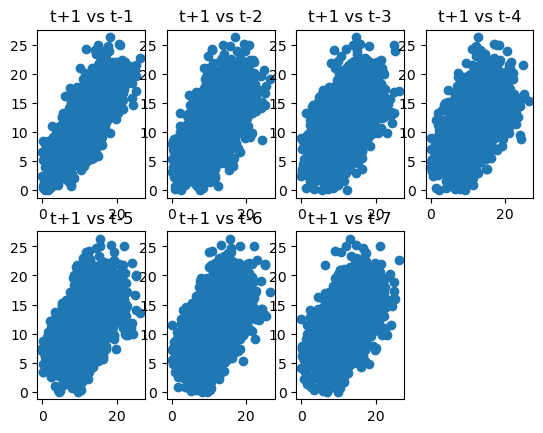

In [75]:
values = DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i )
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

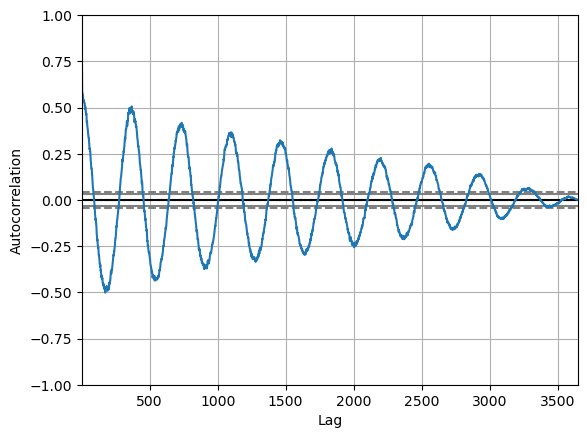

In [72]:
autocorrelation_plot(series)  # Autocorrelation
plt.show()

### EXP - 4 ( `Upsampling and downsampling` )

In [78]:
# Column to use as the date
date_col = "Date"
df = pd.read_csv(r"/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/NVDA.csv", index_col=date_col, parse_dates=True)
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-07-22   19.650000   19.650000   19.170000   19.410000   18.851749   
2015-07-23   19.450001   19.940001   19.410000   19.650000   19.084845   
2015-07-24   19.790001   19.809999   19.340000   19.420000   18.861464   
2015-07-27   19.250000   19.530001   19.090000   19.309999   18.754622   
2015-07-28   19.360001   19.860001   19.160000   19.730000   19.162542   
...                ...         ...         ...         ...         ...   
2020-07-15  416.570007  417.320007  402.230011  409.089996  409.089996   
2020-07-16  400.600006  408.269989  395.820007  405.390015  405.390015   
2020-07-17  409.019989  409.940002  403.510010  408.059998  408.059998   
2020-07-20  410.970001  421.250000  406.269989  420.429993  420.429993   
2020-07-21  420.519989  422.399994  411.470001  413.140015  413.140015   

              Volume  
Date                  
2015-07-22   8911800  
2015-07-23   4247900  
2015-07-24   4721100  
2015-07-27   4810500  
2015-07-28   4957700  
...              ...  
2020-07-15  10099600  
2020-07-16   8624100  
2020-07-17   6657100  
2020-07-20   7121300  
2020-07-21   6925900  

[1259 rows x 6 columns]

In [79]:
# Check that the index is correctly converted to a date
print("The index been parsed as a date: " + str(is_datetime(df.index)))

The index been parsed as a date: True


In [80]:
# Replace this with the name of the column you want to analyze
var_col = "Close"

# Reduce the DataFrame down to the relevant columns
df_subset = df[[var_col]]

In [81]:
# Select the date range you want to explore
df_time = df_subset["2020-1-1":"2021-1-1" ].copy() # Pass in the date ranges you are interested in here
df_time

Close
Date                  
2020-01-02  239.910004
2020-01-03  236.070007
2020-01-06  237.059998
2020-01-07  239.929993
2020-01-08  240.380005
...                ...
2020-07-15  409.089996
2020-07-16  405.390015
2020-07-17  408.059998
2020-07-20  420.429993
2020-07-21  413.140015

[139 rows x 1 columns]

In [82]:
# Set your downsampling periods here
downsample_one = "W"
downsample_two = "M"

In [83]:
# Create a new DataFrame by downsampling with the first downsample period
df_downsample_one = df_time.resample(downsample_one).mean().copy()

# Create a new DataFrame by downsampling with the second downsample period
df_downsample_two = df_time.resample(downsample_two).mean().copy()

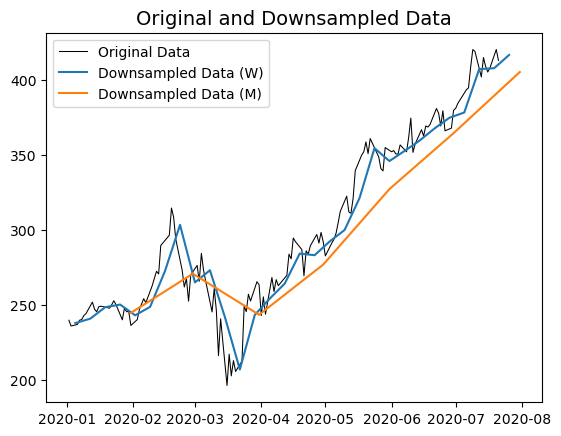

In [84]:
# Plot all three DataFrames
plt.plot(
    df_time.index,
    df_time[var_col],
    label="Original Data",
    color="black",
    linewidth=0.75, )
plt.plot(
    df_downsample_one.index,
    df_downsample_one[var_col],
    label="Downsampled Data " + f"({downsample_one})", )
plt.plot(
    df_downsample_two.index,df_downsample_two[var_col],
    label="Downsampled Data " + f"({downsample_two})", )

# Initialize a legend
plt.legend()

# Set the plot title
plt.title("Original and Downsampled Data", fontsize=14)

# Show the plot
plt.show()

In [85]:
# Set your upsampling period here
upsample = "H"

In [86]:
# Create an example DataFrame for upsampling demonstration
df_time_subset = df_time["2020-01-01":"2020-01-31"]

In [87]:
# Create a new DataFrame by upsampling the example DataFrame
df_upsample = df_time_subset.resample(upsample).asfreq() 

# Preview the upsampled DataFrame
df_upsample

Close
Date                           
2020-01-02 00:00:00  239.910004
2020-01-02 01:00:00         NaN
2020-01-02 02:00:00         NaN
2020-01-02 03:00:00         NaN
2020-01-02 04:00:00         NaN
...                         ...
2020-01-30 20:00:00         NaN
2020-01-30 21:00:00         NaN
2020-01-30 22:00:00         NaN
2020-01-30 23:00:00         NaN
2020-01-31 00:00:00  236.429993

[697 rows x 1 columns]

In [88]:
# Upsample and fill missing values with a given value
df_upsample["nearest_value"] = df_time_subset.resample(upsample).fillna("nearest")

In [89]:
# Upsample and fill missing values with a forward fill
df_upsample["forward_fill"] = df_time_subset.resample(upsample).ffill()

In [90]:
# Upsample and fill missing values with interpolation
df_upsample["interpolate"] = df_time_subset.resample(upsample).interpolate()

In [92]:
df_upsample

Close  nearest_value  forward_fill  interpolate
Date                                                                     
2020-01-02 00:00:00  239.910004     239.910004    239.910004   239.910004
2020-01-02 01:00:00         NaN     239.910004    239.910004   239.750004
2020-01-02 02:00:00         NaN     239.910004    239.910004   239.590004
2020-01-02 03:00:00         NaN     239.910004    239.910004   239.430004
2020-01-02 04:00:00         NaN     239.910004    239.910004   239.270004
...                         ...            ...           ...          ...
2020-01-30 20:00:00         NaN     236.429993    245.809998   237.993327
2020-01-30 21:00:00         NaN     236.429993    245.809998   237.602494
2020-01-30 22:00:00         NaN     236.429993    245.809998   237.211660
2020-01-30 23:00:00         NaN     236.429993    245.809998   236.820827
2020-01-31 00:00:00  236.429993     236.429993    236.429993   236.429993

[697 rows x 4 columns]

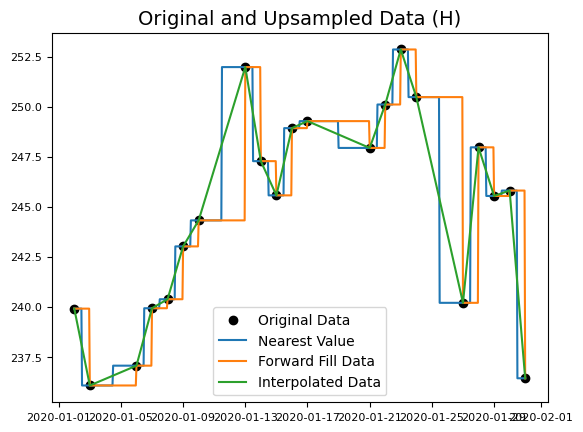

In [91]:
# Plot the original data and three of the upsampling methods
plt.scatter(df_upsample.index, df_upsample[var_col], label="Original Data", color="black" )
plt.plot(df_upsample.index, df_upsample["nearest_value"], label="Nearest Value")
plt.plot(df_upsample.index, df_upsample["forward_fill"], label="Forward Fill Data")
plt.plot(df_upsample.index, df_upsample["interpolate"], label="Interpolated Data")

# Initialize a legend
plt.legend()

# Set the plot title and format labels
plt.title("Original and Upsampled Data " + f"({upsample})", fontsize=14)
plt.xticks(size=8)
plt.yticks(size=8)
# Show the plot
plt.show()

### EXP - 5 ( `stationarity , trend and seasonality` )

In [166]:
df = read_csv(r"/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/data.csv" , names = ["Data","Y-1","Y-2","Y-3"])
df

Data    Y-1    Y-2    Y-3
0    9.08    NaN    NaN    NaN
1   12.63   9.08    NaN    NaN
2   15.00  12.63   9.08    NaN
3   20.73  15.00  12.63   9.08
4    2.20  20.73  15.00  12.63
5   18.00   2.20  20.73  15.00
6    7.16  18.00   2.20  20.73
7   18.28   7.16  18.00   2.20
8   21.00  18.28   7.16  18.00
9   19.68  21.00  18.28   7.16
10  15.54  19.68  21.00  18.28
11  24.00  15.54  19.68  21.00
12  16.10  24.00  15.54  19.68
13  11.93  16.10  24.00  15.54
14  27.00  11.93  16.10  24.00
15  12.51  27.00  11.93  16.10
16  20.04  12.51  27.00  11.93
17  30.00  20.04  12.51  27.00
18  12.41  30.00  20.04  12.51
19  14.33  12.41  30.00  20.04
20  33.00  14.33  12.41  30.00
21  22.11  33.00  14.33  12.41
22  17.91  22.11  33.00  14.33
23  36.00  17.91  22.11  33.00

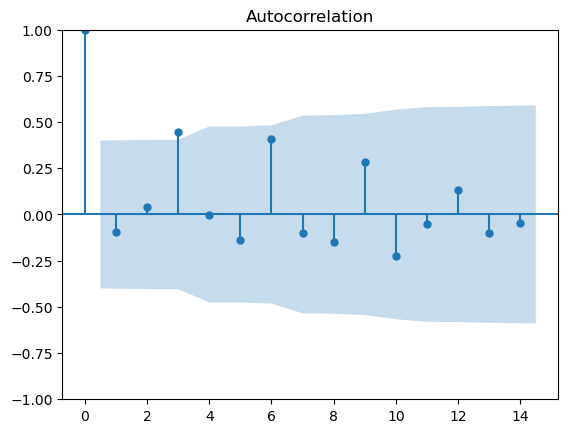

In [167]:
# Autocorrelation
data_column = df["Data"]

plot_acf(data_column)
plt.show()

In [169]:
func , confidence_interval , qstat , pvalue = acf(data_column,nlags = 3)
print(pvalue)

0.445111170739626


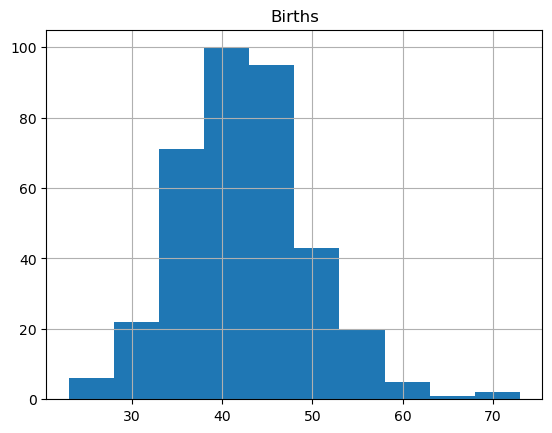

In [170]:
# Stationarity
df = read_csv('/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/daily_total_female_births_in_cal.csv' , header = 0 , index_col = 0)
df.hist()
plt.show()

In [171]:
X = df.values
s = round(len(X)/2)
s_1 , s_2 = X[0:s] , X[s:]
s_1_v , s_2_v = s_1.var() , s_2.var()
s_1_m , s_2_m = s_1.mean() , s_2.mean()
print("mean_1 = %f , mean_2 = %f" %(s_1_m , s_2_m))
print("var_1 = %f , var_2 = %f" %(s_1_v , s_2_v))

mean_1 = 39.763736 , mean_2 = 44.185792
var_1 = 49.213410 , var_2 = 48.708651


In [172]:
X = df.values
r = adfuller(X)

print('ADF Statistic: %f' % r[0])
print('p-value: %f' % r[1])
print('Critical Values:')
for i,j in r[4].items():
    print('\t%s: %.3f' % (i,j))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


- Higher negative value of ADF Statistic means we can reject the null hypothesis.
- The p-value is also less than 0.05 which means the series is stationary and we can reject
the null hypothesis. 
- ADF statistic value is less than value of -3.499 at 1%. This means we can reject the null
hypothesis with a significance level of less than 1%.

### EXP - 5a ( `Remove Trend & Seasonality` )

In [124]:
df = pd.read_csv(r'/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/AirPassengers.csv', index_col=0, parse_dates=True)
df.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

<Axes: xlabel='Month'>

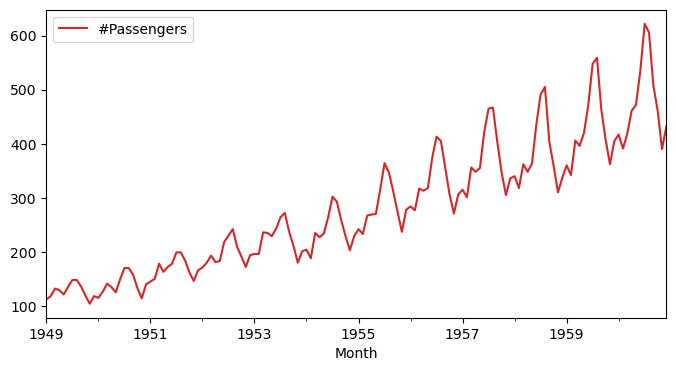

In [120]:
df.plot(figsize=(8,4), color="tab:red")

<Axes: xlabel='Month'>

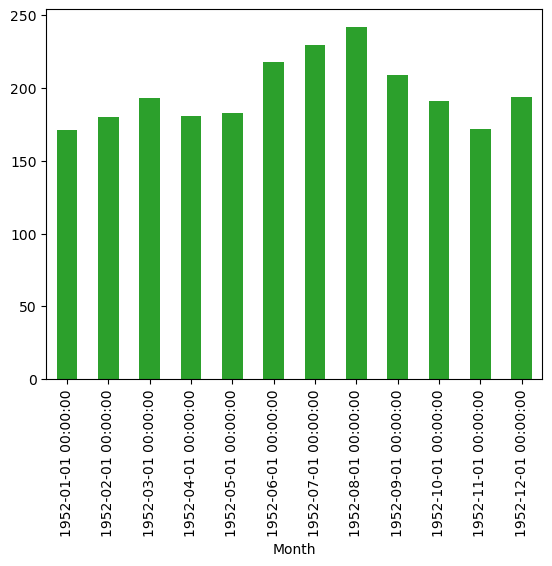

In [123]:
df["1952"].plot(kind="bar", color="tab:green", legend=False)

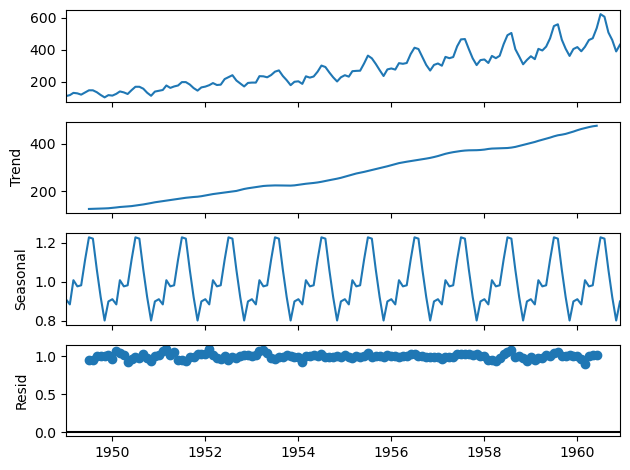

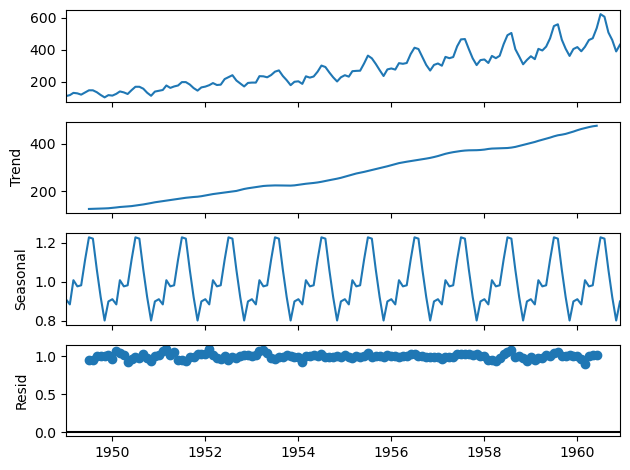

In [125]:
decompose_result = seasonal_decompose(df, model="multiplicative")
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid
decompose_result.plot()

<Axes: title={'center': 'Rolling Mean over 12 month period'}, xlabel='Month'>

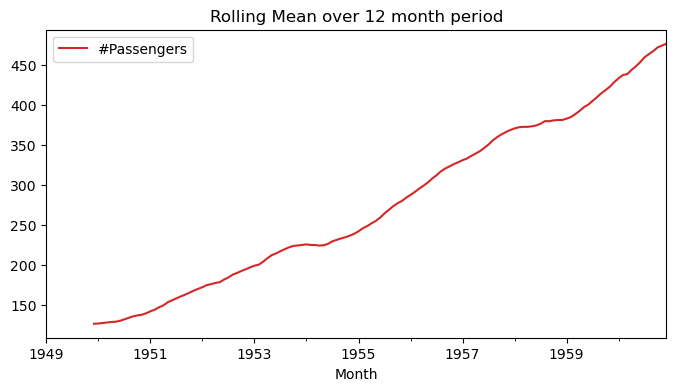

In [126]:
df.rolling(window = 12).mean().plot(figsize=(8,4), color="tab:red", title="Rolling Mean over 12 month period")

<Axes: title={'center': 'Rolling mean over 20 month period'}, xlabel='Month'>

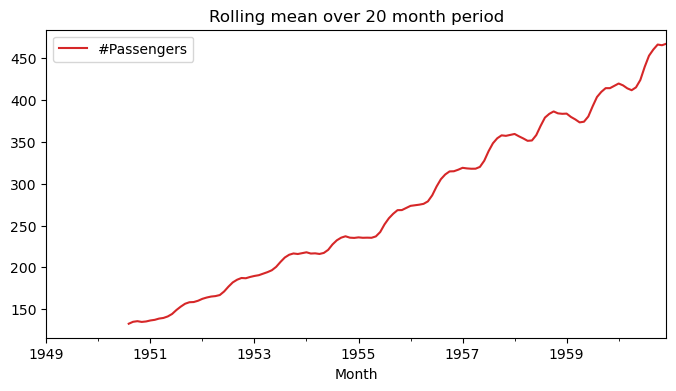

In [127]:
df.rolling(window = 20).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean over 20 month period")

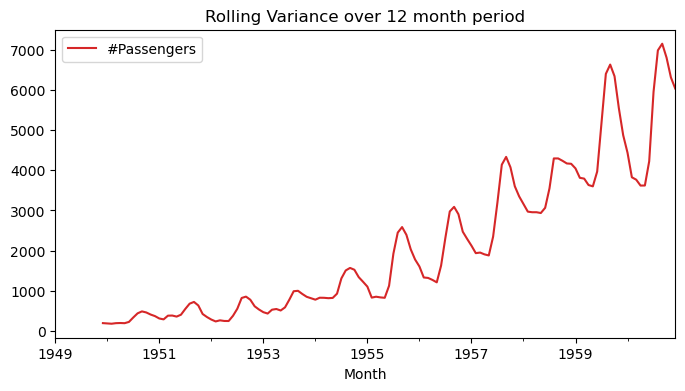

In [128]:
df.rolling(window = 12).var().plot(figsize=(8,4), color="tab:red", title="Rolling Variance over 12 month period");

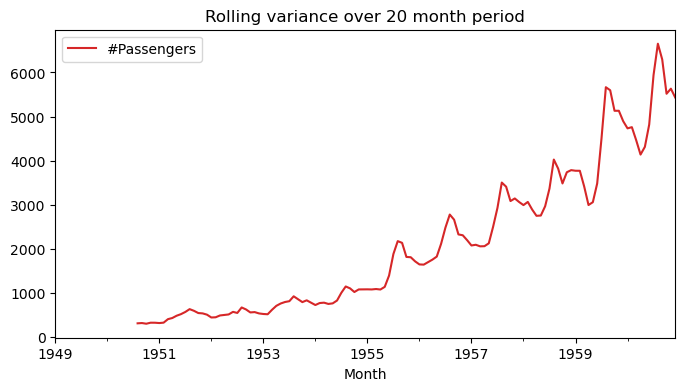

In [129]:
df.rolling(window = 20).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance over 20 month period");

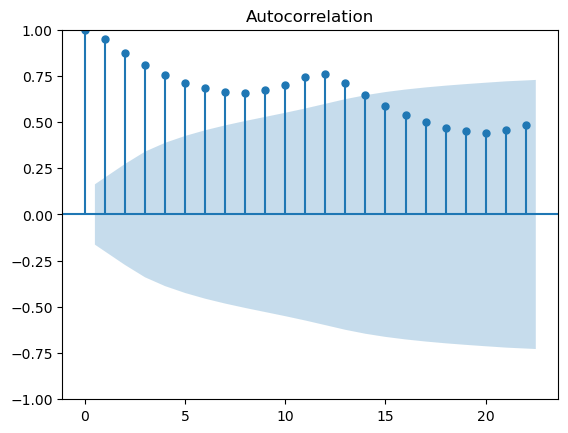

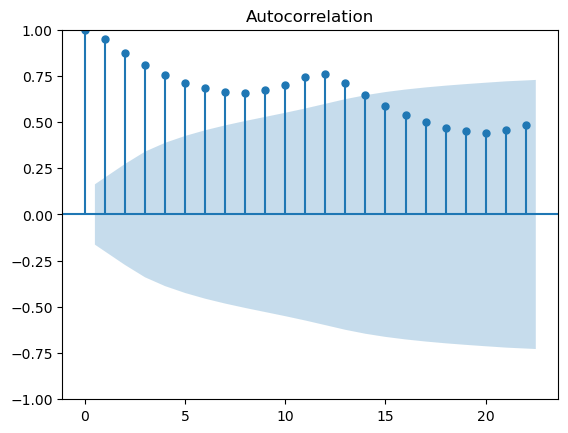

In [130]:
plot_acf(df)

In [133]:
dftest = adfuller(df['#Passengers'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.8153688792060371
2. P-Value :  0.9918802434376408
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


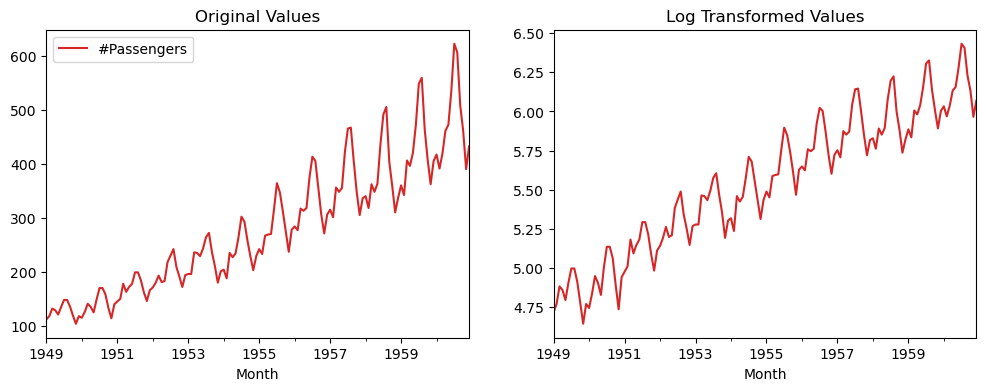

In [142]:
logged_passengers = df["#Passengers"].apply(lambda x : np.log(x))
ax1 = plt.subplot(122)
logged_passengers.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values",ax=ax1);
ax2 = plt.subplot(121)
df.plot(color="tab:red", title="Original Values", ax=ax2);

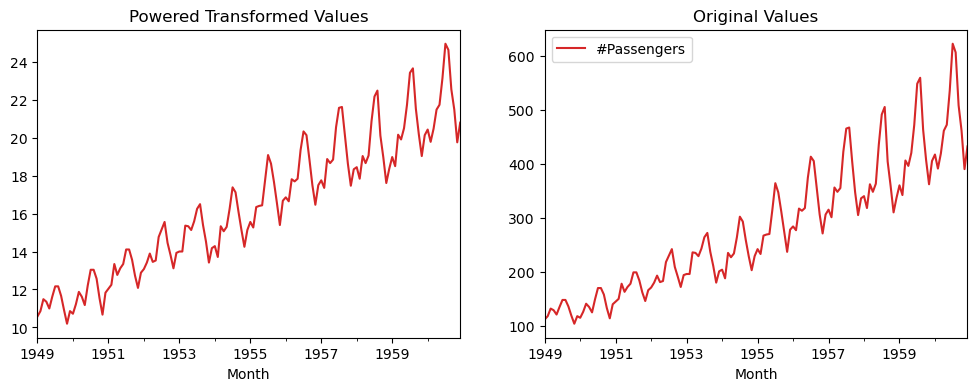

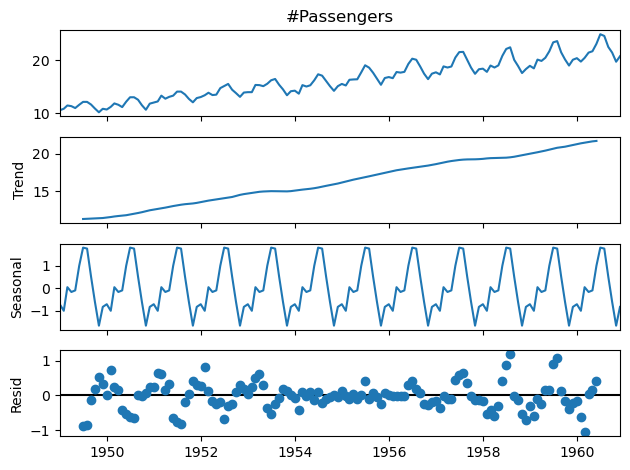

In [143]:
powered_passengers = df["#Passengers"].apply(lambda x : x ** 0.5)
ax1 = plt.subplot(121)
powered_passengers.plot(figsize=(12,4), color="tab:red", title="Powered Transformed Values",ax=ax1);
ax2 = plt.subplot(122)
df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
decompose_result = seasonal_decompose(powered_passengers)
decompose_result.plot();

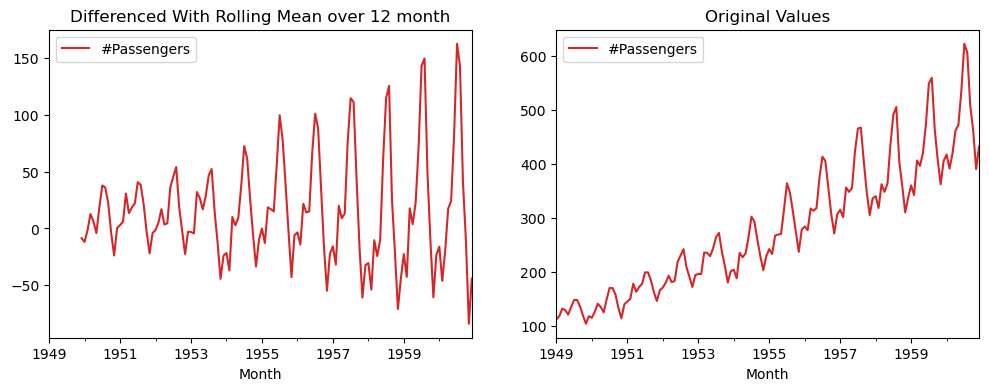

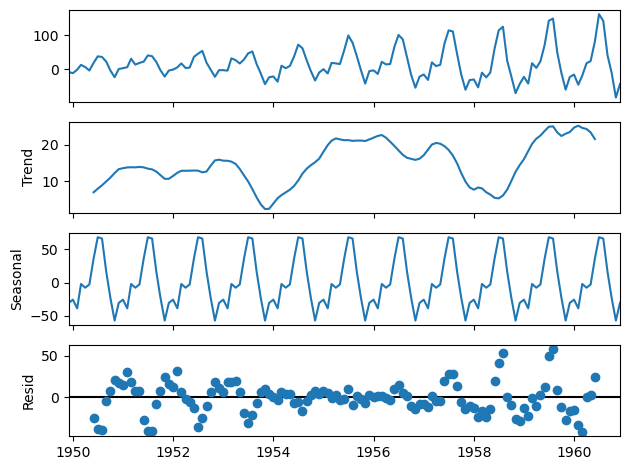

In [144]:
rolling_mean = df.rolling(window = 12).mean()
passengers_rolled_detrended = df - rolling_mean
ax1 = plt.subplot(121)
passengers_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
decompose_result = seasonal_decompose(passengers_rolled_detrended.dropna())
decompose_result.plot();

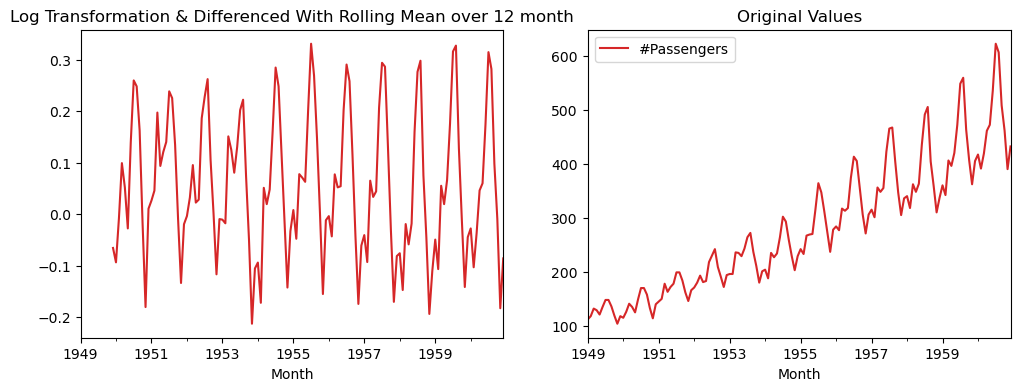

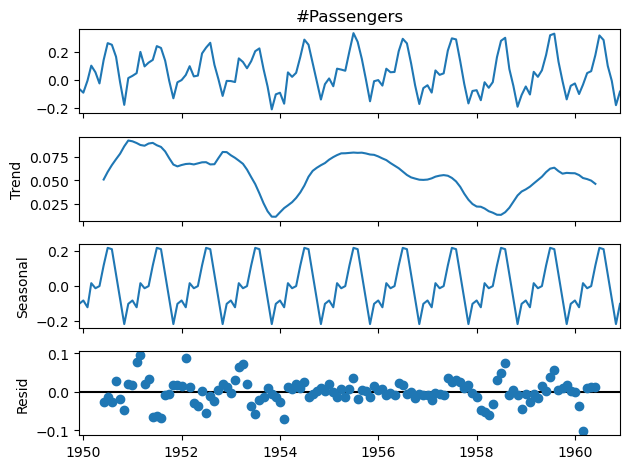

In [146]:
logged_passengers = pd.DataFrame(df["#Passengers"].apply(lambda x : np.log(x)))
rolling_mean = logged_passengers.rolling(window = 12).mean()
passengers_log_rolled_detrended = logged_passengers["#Passengers"] - rolling_mean["#Passengers"]
ax1 = plt.subplot(121)
passengers_log_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Log Transformation & Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
decompose_result = seasonal_decompose(passengers_log_rolled_detrended.dropna())
decompose_result.plot();

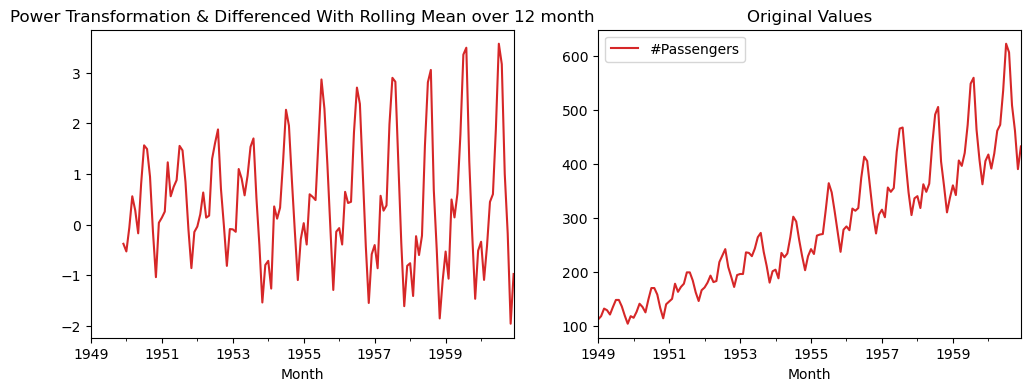

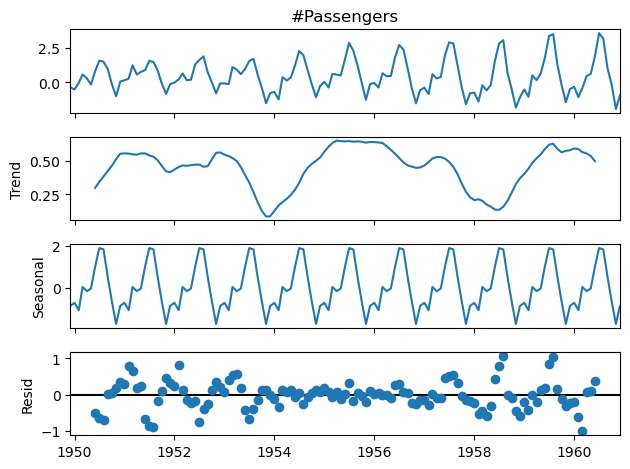

In [147]:
powered_passengers = pd.DataFrame(df["#Passengers"].apply(lambda x : x **0.5))
rolling_mean = powered_passengers.rolling(window = 12).mean()
passengers_pow_rolled_detrended = powered_passengers["#Passengers"] -rolling_mean["#Passengers"]
ax1 = plt.subplot(121)
passengers_pow_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Power Transformation & Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
decompose_result = seasonal_decompose(passengers_pow_rolled_detrended.dropna())
decompose_result.plot();

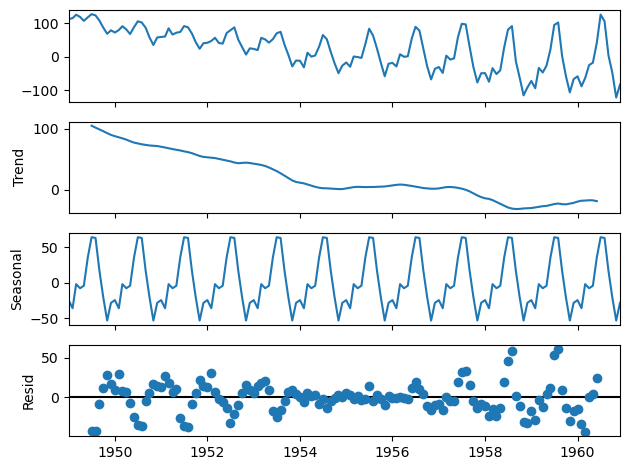

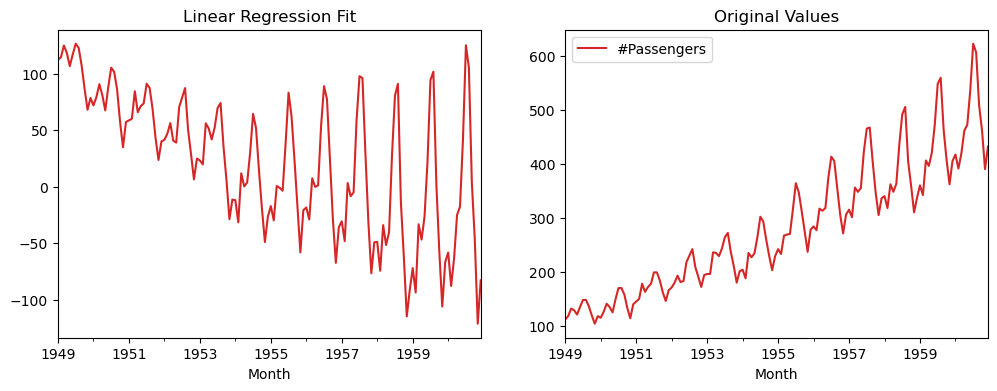

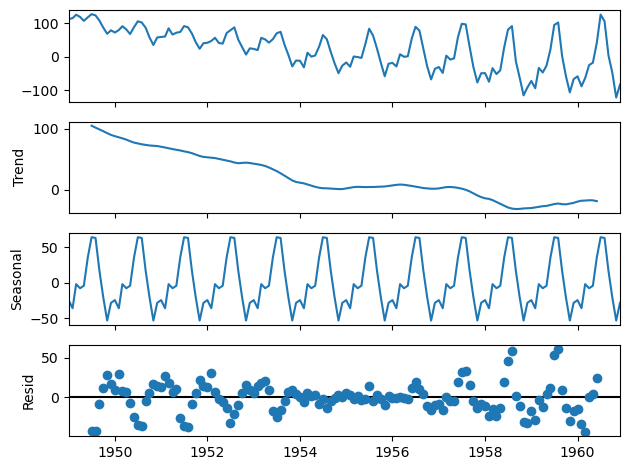

In [153]:
# Applying Linear Regression to Remove Trend

least_squares = OLS(df["#Passengers"].values, list(range(df.shape[0])))
result = least_squares.fit()
fit = pd.Series(result.predict(list(range(df.shape[0]))), index = df.index)
passengers_ols_detrended = df["#Passengers"] - fit
ax1 = plt.subplot(121)
passengers_ols_detrended.plot(figsize=(12,4), color="tab:red", title="Linear Regression Fit", ax=ax1);
ax2 = plt.subplot(122)
df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

decompose_result = seasonal_decompose(passengers_ols_detrended.dropna())
decompose_result.plot()

1. ADF :  -2.7171305983881355
2. P-Value :  0.07112054815085829
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 128
5. Critical Values :
	 1% :  -3.4825006939887997
	 5% :  -2.884397984161377
	 10% :  -2.578960197753906


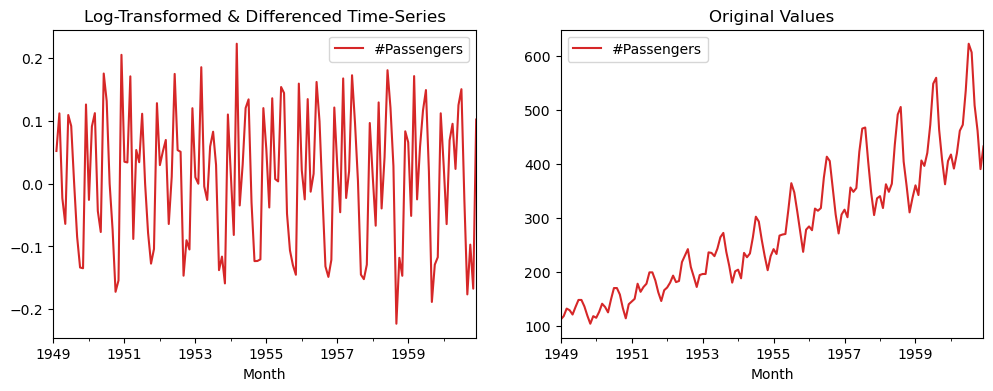

In [164]:
# Remove Seasonality

air_passengers = df
logged_passengers_diff = logged_passengers - logged_passengers.shift()
ax1 = plt.subplot(121)
logged_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Log-Transformed & Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

dftest = adfuller(logged_passengers_diff.dropna()["#Passengers"].values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.1864222911641797
2. P-Value :  0.020784185571268942
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


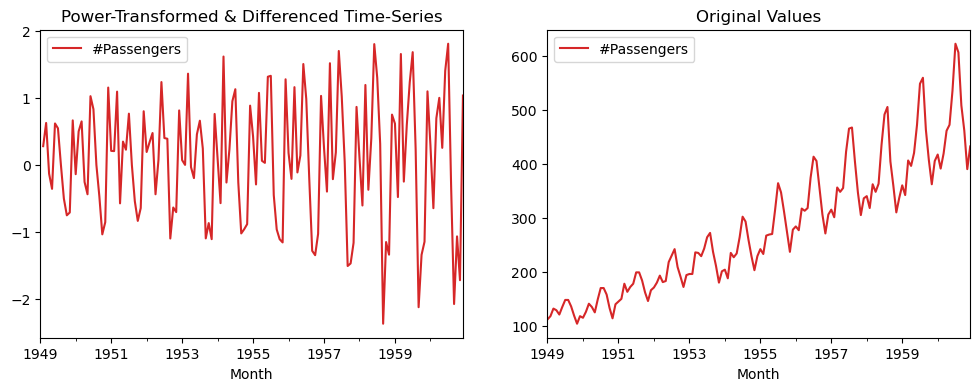

In [163]:
powered_passengers_diff = powered_passengers - powered_passengers.shift()
ax1 = plt.subplot(121)
powered_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Power-Transformed & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

dftest = adfuller(powered_passengers_diff["#Passengers"].dropna().values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.1544826348635366
2. P-Value :  0.02277526496786175
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


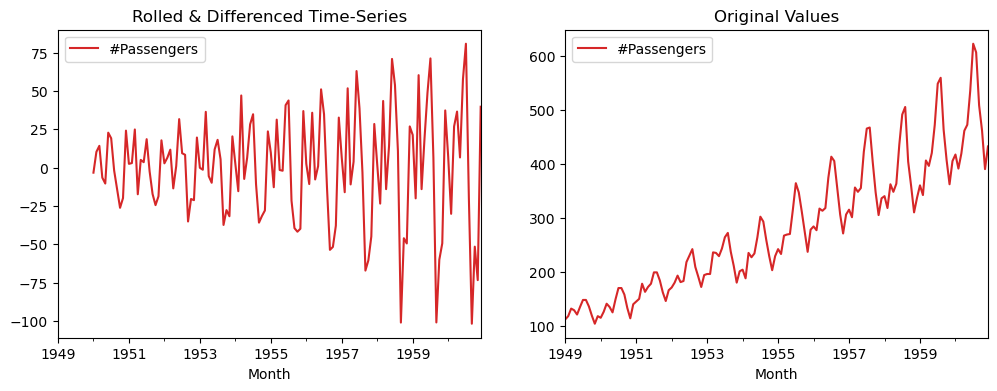

In [162]:
passengers_rolled_detrended_diff = passengers_rolled_detrended - passengers_rolled_detrended.shift()
ax1 = plt.subplot(121)
passengers_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

dftest = adfuller(passengers_rolled_detrended_diff.dropna()["#Passengers"].values, autolag ='AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.912981245419456
2. P-Value :  0.0019413623769368848
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


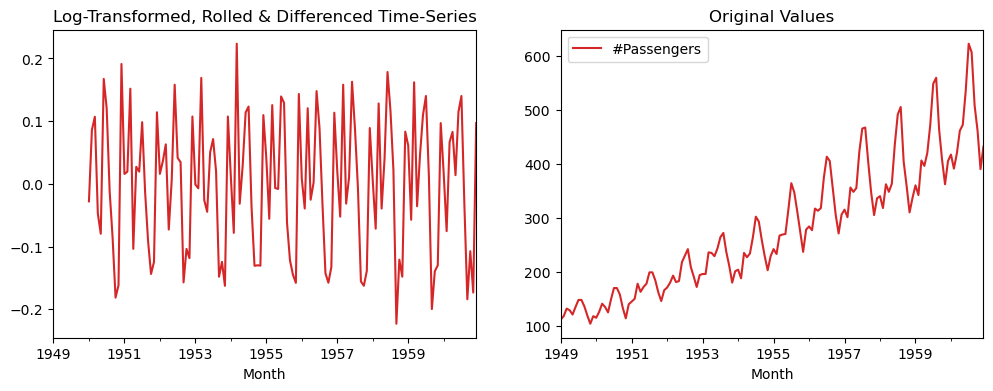

In [161]:
passengers_log_rolled_detrended_diff = passengers_log_rolled_detrended -passengers_log_rolled_detrended.shift()
ax1 = plt.subplot(121)
passengers_log_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Log-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

dftest = adfuller(passengers_log_rolled_detrended_diff.dropna().values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.6224853361907376
2. P-Value :  0.005345423958262398
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


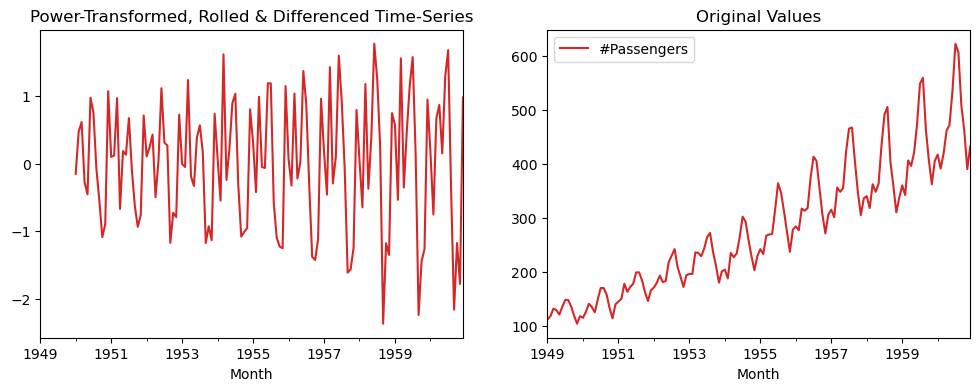

In [160]:
passengers_pow_rolled_detrended_diff = passengers_pow_rolled_detrended - passengers_pow_rolled_detrended.shift()
ax1 = plt.subplot(121)
passengers_pow_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

dftest = adfuller(passengers_pow_rolled_detrended_diff.dropna().values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.6224853361907376
2. P-Value :  0.005345423958262398
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


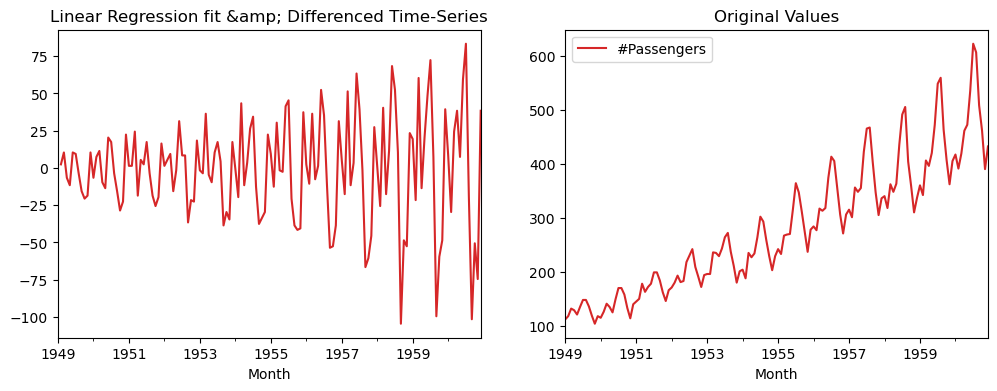

In [165]:
passengers_ols_detrended_diff = passengers_ols_detrended - passengers_ols_detrended.shift()
ax1 = plt.subplot(121)
passengers_ols_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Linear Regression fit &amp; Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

dftest = adfuller(passengers_pow_rolled_detrended_diff.dropna().values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

### EXP - 5b ( `Identify and Remove Seasonality` )

In [173]:
# Read the CSV file
series = read_csv('/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/Daily_Min_Temp.csv', header=0, index_col=0, parse_dates = True)

<Figure size 1200x600 with 0 Axes>

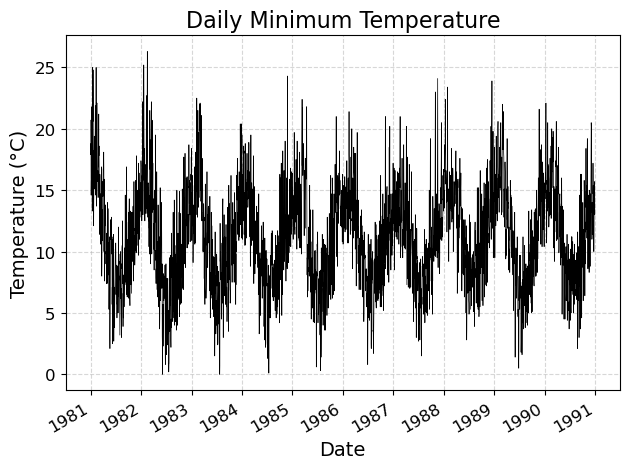

In [174]:
# Seasonal Adjustment with Differencing

# Plotting with customizations
plt.figure(figsize=(12, 6))  # Adjust figure size
series.plot(style='k', legend=None, linewidth=0.5)  # Plot the series with reduced line width

# Customizing labels and title
plt.title('Daily Minimum Temperature', fontsize=16)  # Set the title with an appropriate font size
plt.xlabel('Date', fontsize=14)  # Label for x-axis
plt.ylabel('Temperature (°C)', fontsize=14)  # Label for y-axis

# Adding gridlines and improving readability
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with a dashed style and reduced opacity
plt.xticks(fontsize=12)  # Adjust x-axis tick labels font size
plt.yticks(fontsize=12)  # Adjust y-axis tick labels font size

plt.tight_layout()  # Improve spacing
plt.show()

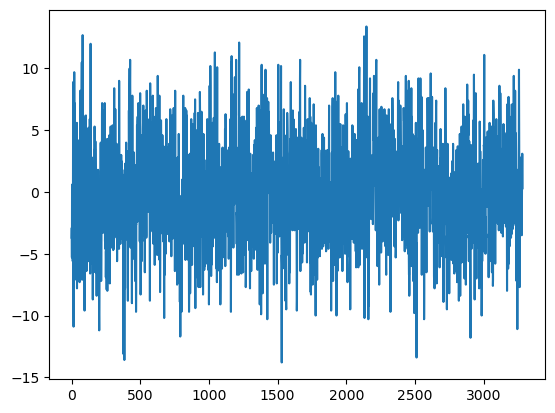

In [175]:
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

                 Temp
Date                 
1981-01-31  17.712903
1981-02-28  17.678571
1981-03-31  13.500000
1981-04-30  12.356667
1981-05-31   9.490323
1981-06-30   7.306667
1981-07-31   7.577419
1981-08-31   7.238710
1981-09-30  10.143333
1981-10-31  10.087097
1981-11-30  11.890000
1981-12-31  13.680645
1982-01-31  16.567742


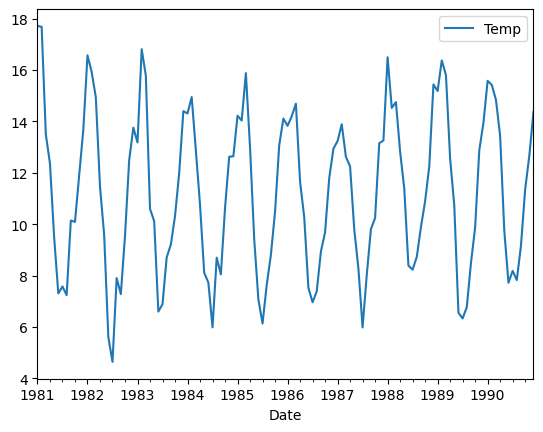

In [176]:
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
plt.show()

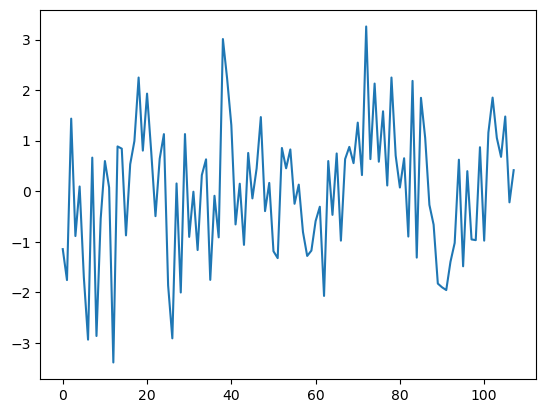

In [177]:
resample = series.resample('M')
monthly_mean = resample.mean()
X = series.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean.iloc[i] - monthly_mean.iloc[i - months_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

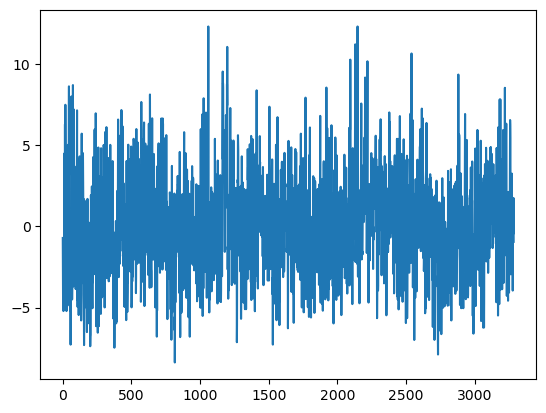

In [178]:
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
    month_mean_last_year = series.loc[month_str].mean()
    value = X[i] - month_mean_last_year
    diff.append(value)
plt.plot(diff)
plt.show()


Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


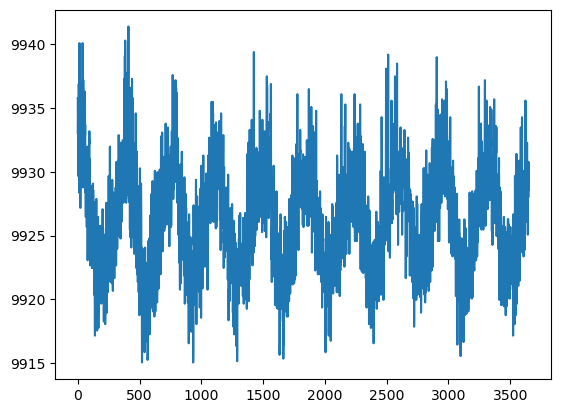

In [184]:
# Seasonal Adjustment with Modeling

# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)

# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)
plt.plot(diff)
plt.show()

### EXP - 6a ( `Autocorrelation Function and Partial Autocorrelation Function` )

In [189]:
df = pd.read_csv("/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/AirPassengers.csv", index_col=0)
df.index = to_datetime(df.index)
y = df["#Passengers"]
y

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

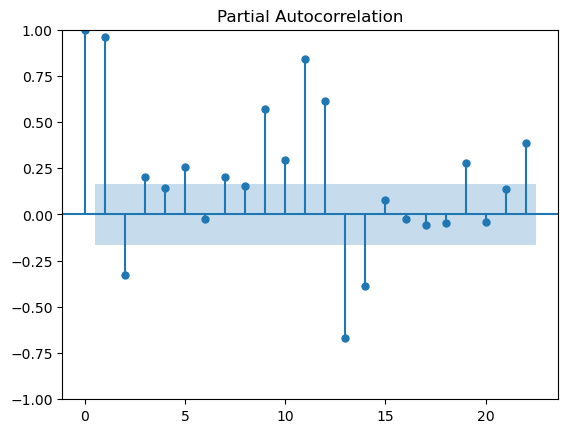

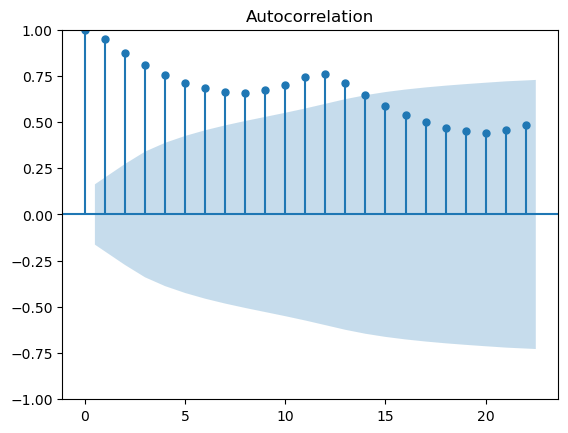

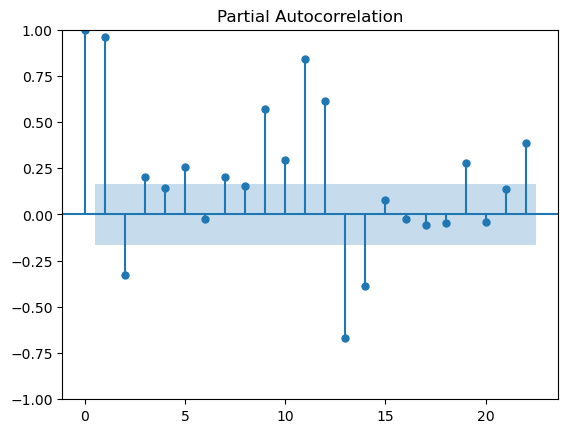

In [195]:
plot_acf(df)
plot_pacf(df, method="ols")

In [197]:
# Acf function
acf(y, nlags=10)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

In [198]:
# Pacf function
pacf(df, nlags=10, method="ols")
N_LAGS = 10

In [199]:
# First pacf is always equal to 1
pacf_list = [1]

In [200]:
X = pd.DataFrame(lagmat(y, N_LAGS))
X.columns = [f"lag_{lag+1}" for lag in range(10)]
for k in range(1, N_LAGS + 1):
    fitted_model = LinearRegression().fit(X.iloc[k:, :k],y.iloc[k:])
    pacf_list.append(fitted_model.coef_[-1])
np.array(pacf_list)

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358])

In [207]:
print(pacf(y, 2, method="ols-inefficient"))
pacf(y, 4, method="ols-inefficient")

[ 1.          0.95868964 -0.33258806]


array([ 1.        ,  0.95860315, -0.33427195,  0.1970437 ,  0.13909745])

In [208]:
print(pacf(y, 2, method="ols"))
pacf(y, 4, method="ols")

[ 1.          0.95893198 -0.32983096]


array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798])

### EXP - 6b ( `Forecasting Methods` )

In [211]:
data = [x + random() for x in range(1, 100)]
data[:10]

[1.8277405736010253,
 2.2639388292475258,
 3.191035785548325,
 4.604183591612867,
 5.179674976585865,
 6.769918012138955,
 7.8912877673368405,
 8.362919777384796,
 9.419151264932928,
 10.819104689168787]

In [213]:
# AR

# Fit 
model = AutoReg(data, lags=1)
model_fit = model.fit()

# Predict
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.49356108]


In [215]:
# MA

# Fit
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()

# Predict
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[71.29678249]


/Users/muditgolchha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [216]:
# ARMA

# Fit
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()

# Predict
yhat = model_fit.predict(len(data), len(data))
print(yhat)

/Users/muditgolchha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[100.48320614]


/Users/muditgolchha/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [217]:
# ARIMA

# Fit
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Predict
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[100.48921832]


/Users/muditgolchha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


### EXP - 7 ( `De - Seasonalize` )

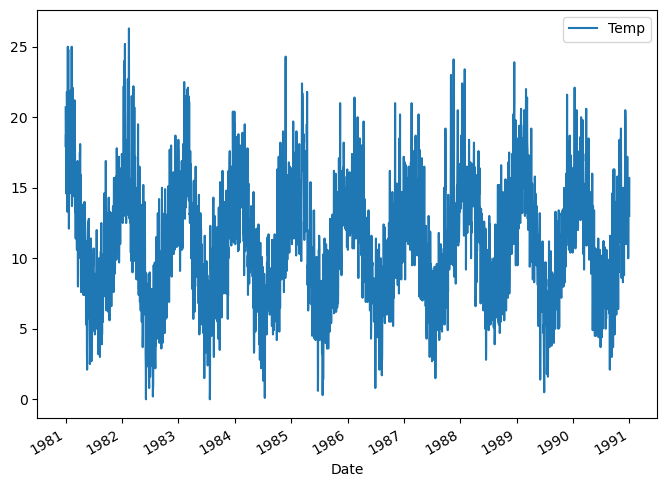

In [219]:
# Read the CSV file
df = read_csv('/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/Daily_Min_Temp.csv', header=0, index_col=0, parse_dates = ['Date'])
df.plot(figsize=(8,6))
plt.show()

In [220]:
# automatic differencing 
diff = df.diff(periods = 1)

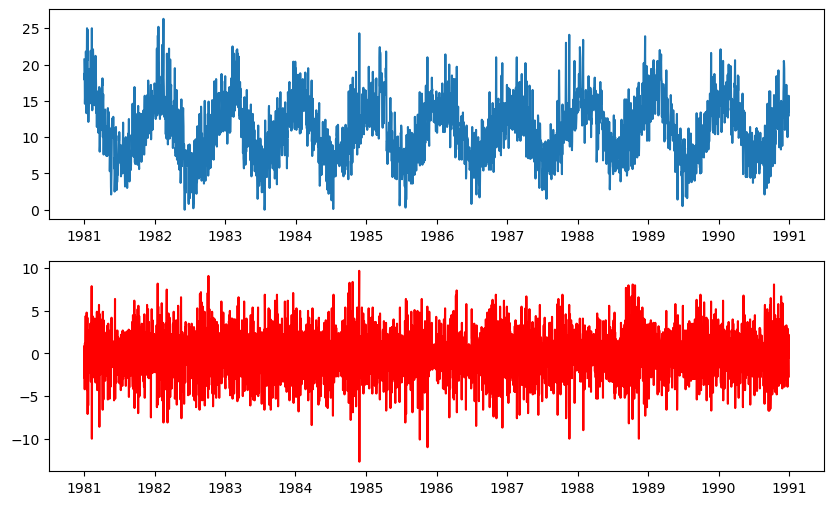

In [223]:
plt. figure (figsize=(10,6))
plt. subplot (2,1,1)
plt. plot(df,label='original data')
plt. subplot (2,1,2)
plt.plot(diff,label='differenced data',color='red')
plt. show()

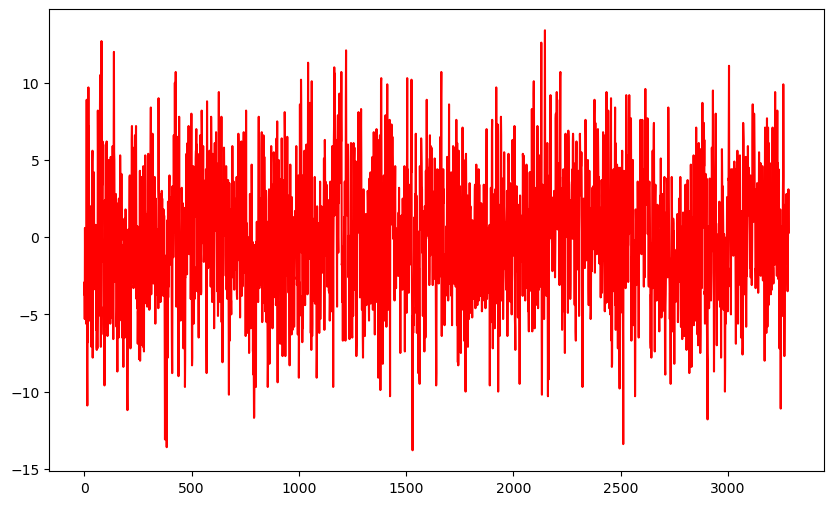

In [225]:
# Manual Differecing

x=df.values 
diff=list()
year=365
for i in range(year, len(x)): 
    value = x[i]-x[i-year]
    diff.append (value)
plt. figure (figsize=(10,6)) 
plt.plot(diff,color='red')
plt.show()

In [228]:
# Polynomial model
from numpy import polyfit 
x=[1%365 for i in range(0,len(df))]
y=series. values
dg=4
coef=polyfit(x,y,dg)
print( 'Coefficients : ',coef)


Coefficients :  [[2.23555068]
 [2.23555068]
 [2.23555068]
 [2.23555068]
 [2.23555068]]


/Users/muditgolchha/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [229]:
curve=list()
for i in range(len(x)): 
    value=coef[-1]
    for d in range(dg):
        value+=x[i]**dg-d*coef[d]
        curve.append(value)

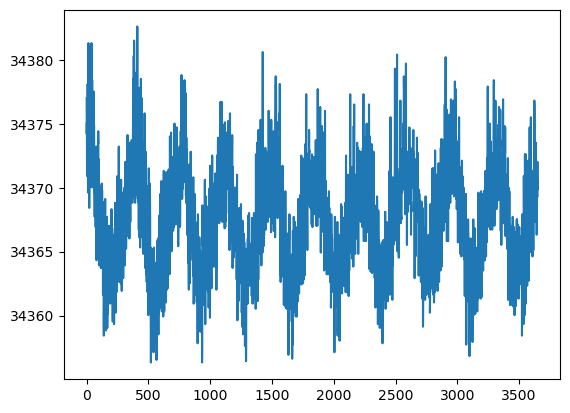

In [230]:
values=df.values 
diff=list()
for i in range(len(values)): 
    value = values[i]-curve[i]
    diff.append (value)
plt.plot(diff)
plt.show()

### EXP - 8 & 9 ( `ARMA & ARIMA` )

In [244]:
# Load the time series data
data = pd.read_csv("/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/Daily_Min_Temp.csv", parse_dates=True, index_col="Date")
data

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[3650 rows x 1 columns]

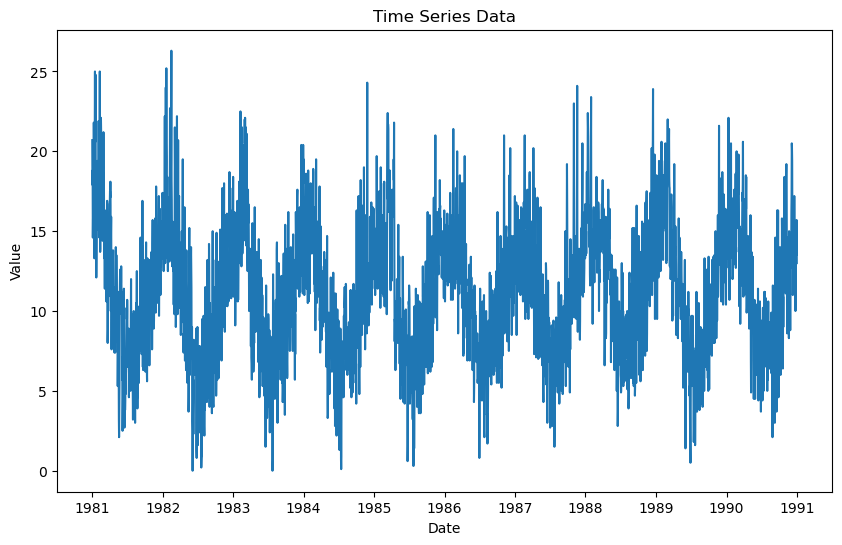

ADF Statistic: -4.444804924611694
p-value: 0.0002470826300361039
Critical Values:
   1%: -3.4321532327220154
   5%: -2.862336767636517
   10%: -2.56719413172842


In [245]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Perform the Augmented Dickey-Fuller test for stationarity
result = adfuller(data['Temp'])
print('ADF Statistic:', result[0])
p_value= result[1]
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')
    

In [246]:
if p_value > 0.05:  # If non-stationary
    # Apply differencing
    data['Temp'] = data['Temp'].diff()

    # Check for stationarity again
    result_diff = adfuller(data["Temp"].dropna())
    p_value_diff = result_diff[1]

    if p_value_diff < 0.05:
        print("Data is now stationary after differencing")
    else:
        print("Data is still not stationary after differencing")
else:
    print("Data is already stationary")

Data is already stationary


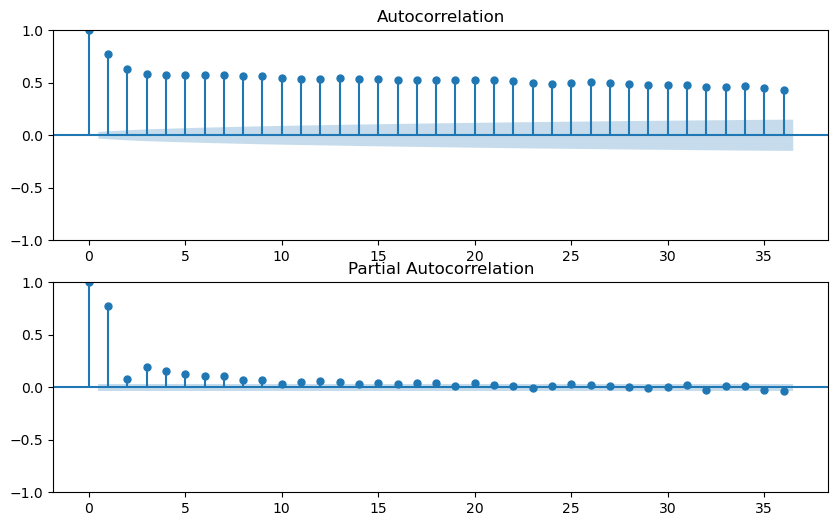

In [247]:
# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(data, ax=ax[0])
plot_pacf(data, ax=ax[1])
plt.show()

In [251]:
# Define the range of p and q values
p_values = range(1, 4)
q_values = range(1, 4)

# Fit and evaluate ARIMA models for all combinations of p and q
best_model = None
best_bic = float("inf")
for p in p_values:
    for q in q_values:
        try:
            model = ARIMA(data, order=(p, 0, q))
            result = model.fit()
            bic = result.bic
            if bic < best_bic:
                best_model = result
                best_bic = bic
        except:
            continue

# Print the best model summary
print(best_model.summary())

/Users/muditgolchha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/muditgolchha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/muditgolchha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/muditgolchha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information an

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -8382.800
Date:                Tue, 30 Apr 2024   AIC                          16777.600
Time:                        01:41:28   BIC                          16814.815
Sample:                             0   HQIC                         16790.853
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4721      0.801     14.319      0.000       9.902      13.042
ar.L1          1.4851      0.018     80.329      0.000       1.449       1.521
ar.L2         -0.6204      0.027    -23.367      0.0

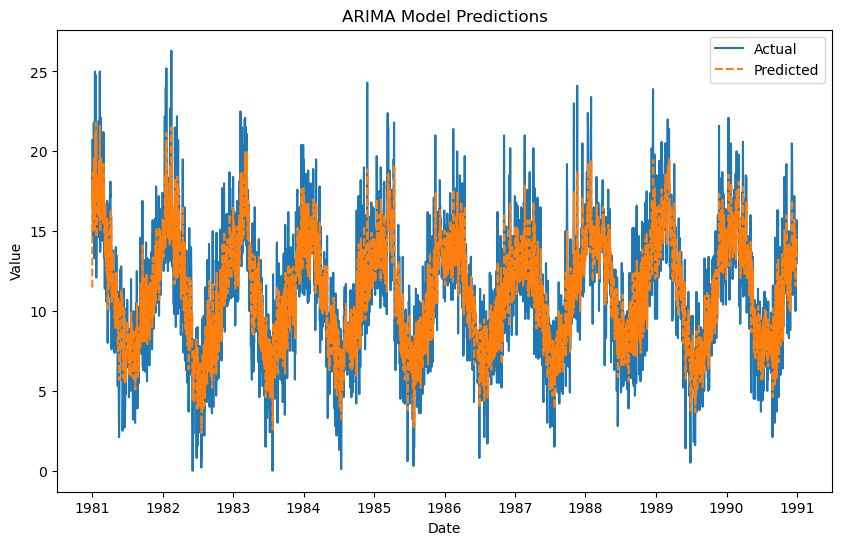

In [250]:
# Make predictions
predictions = best_model.predict(start=data.index[0], end=data.index[-1])

# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

### EXP - 10 ( `SARIMAX` )

In [253]:
# Load the data into a DataFrame
data = pd.read_csv("/Users/muditgolchha/Documents/TIME SERIES/TS_LAB/DATASET/Sunspots.csv")

In [254]:
# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

In [255]:
my_order = (1, 1, 1)  # Define the order (p, d, q)
my_seasonal_order = (1, 1, 1, 12)  # Define the seasonal order (P, D, Q, s)
model = SARIMAX(data['Monthly Mean Total Sunspot Number'], order=my_order, seasonal_order=my_seasonal_order)

In [256]:
# Fit the model
results = model.fit()

# Print summary of the model
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81697D+00    |proj g|=  1.23565D-01


 This problem is unconstrained.



At iterate    5    f=  4.72441D+00    |proj g|=  5.54001D-02

At iterate   10    f=  4.65940D+00    |proj g|=  8.26052D-02

At iterate   15    f=  4.63627D+00    |proj g|=  3.05734D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   1.584D-05   4.636D+00
  F =   4.6362663900273153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                       SARIMAX Results                                       
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 3265
Model:                SARIMAX(1, 1, 1)x(1, 1, 1, 

In [257]:
# Make prediction
forecast_start = len(data)  # Start predicting from the end of the available data
forecast_end = forecast_start + 12  # Define the end point for the forecast (e.g., forecast for the next 12 months)
forecast = results.predict(start=forecast_start, end=forecast_end)

# Print the forecast
print(forecast)

3265    14.830656
3266    14.117844
3267    15.321110
3268    16.859793
3269    16.660905
3270    16.609572
3271    17.784168
3272    16.812201
3273    17.345742
3274    16.693228
3275    16.996598
3276    12.833104
3277    15.844130
Name: predicted_mean, dtype: float64


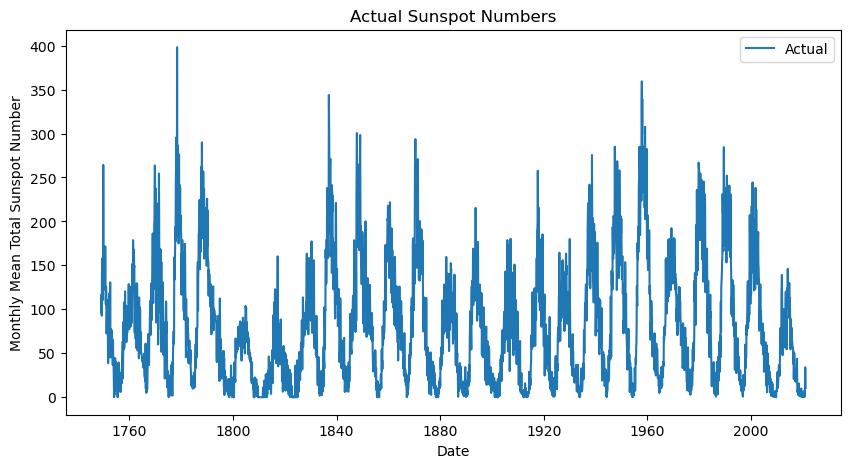

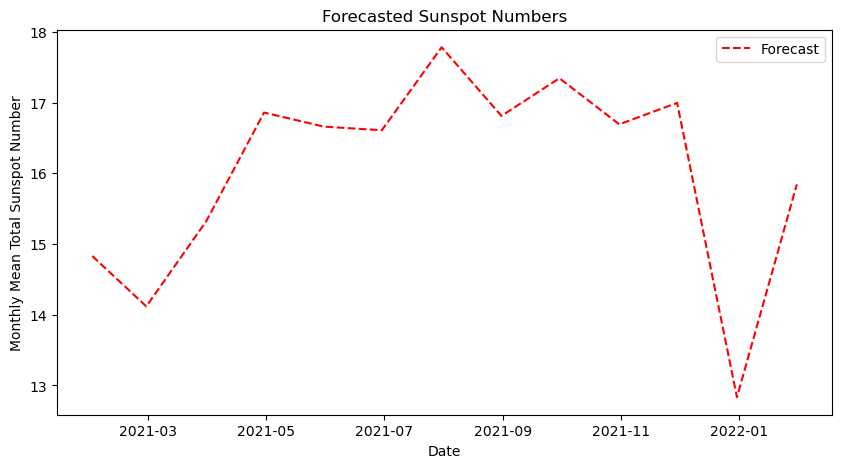

In [258]:
# Plot actual data
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
plt.plot(data['Date'], data['Monthly Mean Total Sunspot Number'], label='Actual')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Actual Sunspot Numbers')
plt.legend()
plt.show()

# Plot forecasted data
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
forecast_dates = pd.date_range(start=data['Date'].iloc[-1], periods=len(forecast), freq='M')
plt.plot(forecast_dates, forecast, color='red', linestyle='--', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Forecasted Sunspot Numbers')
plt.legend()
plt.show()


### EXP - 11 ( `VAR` )

In [260]:
sun_spot_monthly_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'

In [261]:
df = pd.read_csv(sun_spot_monthly_url, header=0, parse_dates=[0], index_col=0)
df

Sunspots
Month               
1749-01-01      58.0
1749-02-01      62.6
1749-03-01      70.0
1749-04-01      55.7
1749-05-01      85.0
...              ...
1983-08-01      71.8
1983-09-01      50.3
1983-10-01      55.8
1983-11-01      33.3
1983-12-01      33.4

[2820 rows x 1 columns]

In [262]:
df['Me_dif'] = df['Sunspots'] - df['Sunspots'].mean()
train = df.iloc[:1410]
test = df.iloc[1410:]
df

Sunspots     Me_dif
Month                          
1749-01-01      58.0   6.734043
1749-02-01      62.6  11.334043
1749-03-01      70.0  18.734043
1749-04-01      55.7   4.434043
1749-05-01      85.0  33.734043
...              ...        ...
1983-08-01      71.8  20.534043
1983-09-01      50.3  -0.965957
1983-10-01      55.8   4.534043
1983-11-01      33.3 -17.965957
1983-12-01      33.4 -17.865957

[2820 rows x 2 columns]

In [265]:
#fit the model
model = VAR(endog = train)
model_fit = model.fit()

In [267]:
print(model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Apr, 2024
Time:                     02:45:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -24.8512
Nobs:                     1409.00    HQIC:                  -24.8653
Log likelihood:           13530.9    FPE:                1.57591e-11
AIC:                     -24.8736    Det(Omega_mle):         0.00000
--------------------------------------------------------------------
Results for equation Sunspots
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.021046              NAN              NAN             NAN
L1.Sunspots         0.991874              NAN              NAN             NAN
L1.Me_dif          -0.087073              NAN              NAN   

In [268]:
resi = model_fit.resid
resi == pd.DataFrame(resi)
resi

Sunspots     Me_dif
Month                           
1749-02-01   5.636645   5.636645
1749-03-01   8.874563   8.874563
1749-04-01 -12.120959 -12.120959
1749-05-01  30.117685  30.117685
1749-06-01   2.107036   2.107036
...               ...        ...
1866-02-01   5.323373   5.323373
1866-03-01 -14.629269 -14.629269
1866-04-01  -9.143025  -9.143025
1866-05-01  -7.509423  -7.509423
1866-06-01   0.343139   0.343139

[1409 rows x 2 columns]

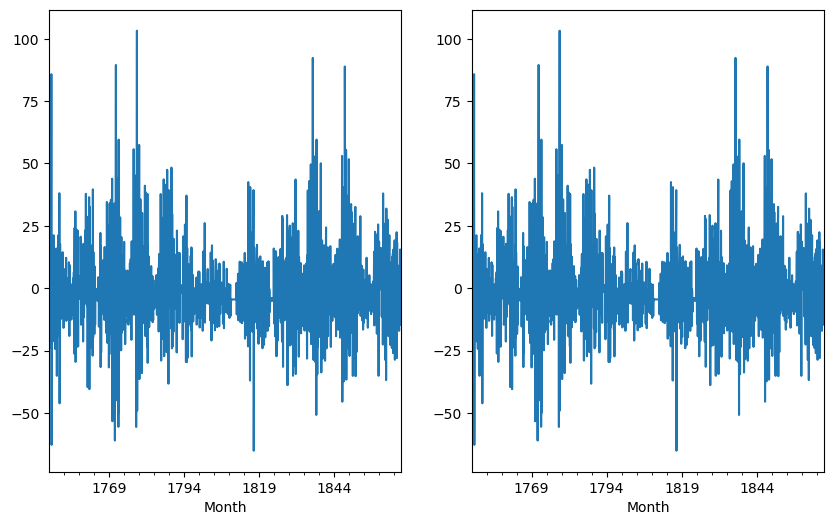

In [272]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
resi['Sunspots'].plot()

plt.subplot(1,2,2)
resi['Me_dif'].plot()
plt.show()

### EXP - 12a ( `ARCH/GARCH` )

In [276]:
df = pd.read_csv(sun_spot_monthly_url, header=0, parse_dates=[0], index_col=0)
df

Sunspots
Month               
1749-01-01      58.0
1749-02-01      62.6
1749-03-01      70.0
1749-04-01      55.7
1749-05-01      85.0
...              ...
1983-08-01      71.8
1983-09-01      50.3
1983-10-01      55.8
1983-11-01      33.3
1983-12-01      33.4

[2820 rows x 1 columns]

In [277]:
series = df.squeeze()
series

Month
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
              ... 
1983-08-01    71.8
1983-09-01    50.3
1983-10-01    55.8
1983-11-01    33.3
1983-12-01    33.4
Name: Sunspots, Length: 2820, dtype: float64

In [278]:
model = arch_model(df['Sunspots'], vol='Arch', p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 21796.399788111696
Iteration:      2,   Func. Count:     10,   Neg. LLF: 16088.360304738317
Iteration:      3,   Func. Count:     15,   Neg. LLF: 13684.38117390486
Iteration:      4,   Func. Count:     20,   Neg. LLF: 17315.770384099902
Iteration:      5,   Func. Count:     25,   Neg. LLF: 13672.99915561359
Iteration:      6,   Func. Count:     29,   Neg. LLF: 13672.859150293885
Iteration:      7,   Func. Count:     33,   Neg. LLF: 13672.012505642371
Iteration:      8,   Func. Count:     37,   Neg. LLF: 13667.651668716353
Iteration:      9,   Func. Count:     41,   Neg. LLF: 13651.571904314324
Iteration:     10,   Func. Count:     45,   Neg. LLF: 13648.768082014707
Iteration:     11,   Func. Count:     49,   Neg. LLF: 13645.21472306827
Iteration:     12,   Func. Count:     53,   Neg. LLF: 13644.23173538562
Iteration:     13,   Func. Count:     57,   Neg. LLF: 13643.420064988484
Iteration:     14,   Func. Count:     61,   Neg. LLF: 1

In [279]:
# Summary
print(results.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:               Sunspots   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -13643.4
Distribution:                  Normal   AIC:                           27292.8
Method:            Maximum Likelihood   BIC:                           27310.7
                                        No. Observations:                 2820
Date:                Tue, Apr 30 2024   Df Residuals:                     2819
Time:                        02:50:21   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            19.8611     12.024      1.652  9.859e-02 [ -3.706, 43.42

In [280]:
# Forecasting Data
forecast = results.forecast(horizon=1)
print("Forecasted volatility for the next day:", forecast.variance[-1:].values[0, 0])

Forecasted volatility for the next day: 303.4748631686584


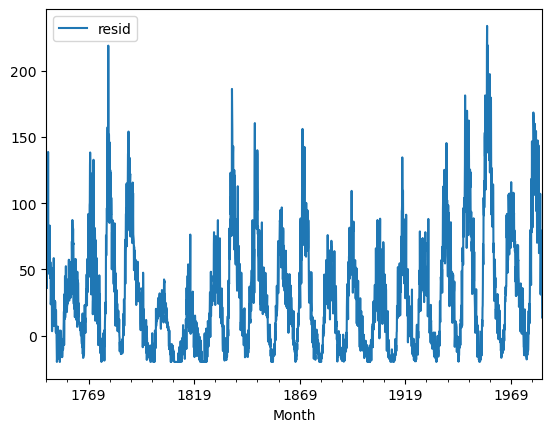

In [281]:
# line plot of residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()

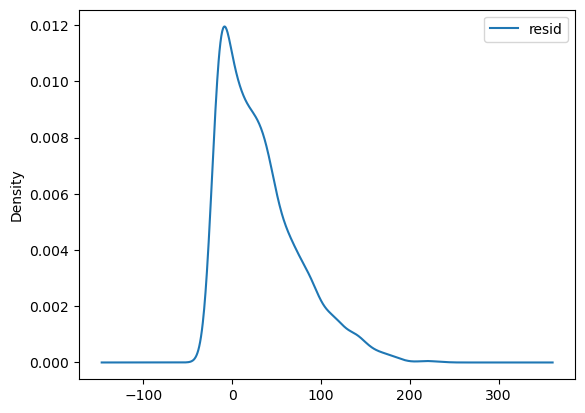

In [282]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [283]:
#GARCH
model = arch_model(df['Sunspots'], vol='Garch', p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 93718.1063525312
Iteration:      2,   Func. Count:     13,   Neg. LLF: 52896.75023602781
Iteration:      3,   Func. Count:     23,   Neg. LLF: 13849.324774479634
Iteration:      4,   Func. Count:     29,   Neg. LLF: 18228.02099077725
Iteration:      5,   Func. Count:     35,   Neg. LLF: 13552.174972720015
Iteration:      6,   Func. Count:     40,   Neg. LLF: 13549.057848820234
Iteration:      7,   Func. Count:     45,   Neg. LLF: 13547.769372830797
Iteration:      8,   Func. Count:     50,   Neg. LLF: 13547.229740987706
Iteration:      9,   Func. Count:     55,   Neg. LLF: 13547.004825853406
Iteration:     10,   Func. Count:     60,   Neg. LLF: 13546.732086147404
Iteration:     11,   Func. Count:     65,   Neg. LLF: 13546.420254771825
Iteration:     12,   Func. Count:     70,   Neg. LLF: 13546.271871569998
Iteration:     13,   Func. Count:     75,   Neg. LLF: 13546.232409457989
Iteration:     14,   Func. Count:     80,   Neg. LLF: 1

In [284]:
# Summary
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               Sunspots   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -13546.2
Distribution:                  Normal   AIC:                           27100.5
Method:            Maximum Likelihood   BIC:                           27124.2
                                        No. Observations:                 2820
Date:                Tue, Apr 30 2024   Df Residuals:                     2819
Time:                        02:50:22   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            19.0312      3.935      4.836  1.326e-06 [ 11.318, 26.74

In [285]:
# Forecasting Data
forecast = results.forecast(horizon=1)
print("Forecasted volatility for the next day:", forecast.variance[-1:].values[0, 0])

Forecasted volatility for the next day: 641.0394842415002


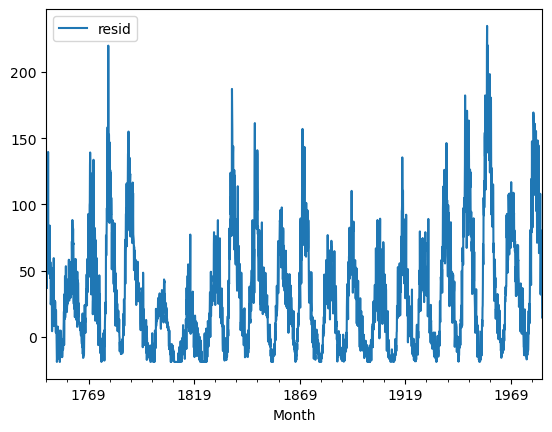

In [286]:
# line plot of residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()

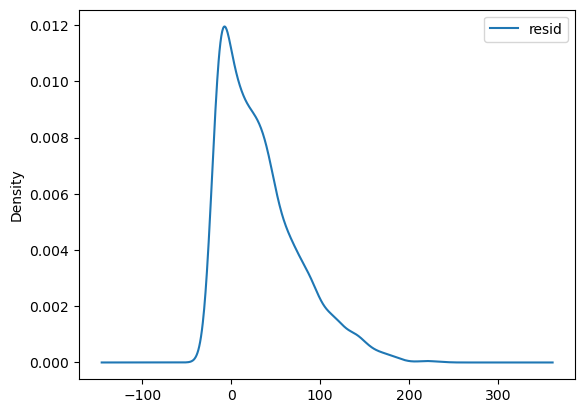

In [287]:
#density plot of residuals
residuals.plot(kind='kde')
plt.show()

### EXP - 12b ( `Kalman Filter` )

In [315]:
# Now, create the filter
my_filter = KalmanFilter(dim_x=2, dim_z=1)
# Initialize the filter's matrices.

my_filter.x = np.array([[2.],
                         [0.]])       # initial state (location and velocity)

my_filter.F = np.array([[1., 1.],
                        [0., 1.]])    # state transition matrix

my_filter.H = np.array([[1., 0.]])    # Measurement function
my_filter.P *= 1000.                   # covariance matrix
my_filter.R = 5                        # measurement uncertainty
my_filter.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.1)  # process uncertainty

# Lists to store data for visualization
true_positions = []
measurements = []
filtered_positions = []

In [316]:
# Define a function to simulate noisy measurements
def get_some_measurement(true_position, measurement_noise=1.0):
    # Simulate noisy measurement around the true position
    return true_position + np.random.normal(0, measurement_noise)


In [317]:
# Lists to store data for visualization
true_positions = []
measurements = []
filtered_positions = []

In [318]:
# Finally, run the filter.
true_position = 2.0  # Initial true position of the object
for _ in range(50):  # Simulate 50 time steps
    true_positions.append(true_position)
    
    my_filter.predict()
    measurement = get_some_measurement(true_position)
    measurements.append(measurement)
    
    my_filter.update(measurement)

    # Extract the filtered position from the state vector
    filtered_position = my_filter.x[0, 0]
    filtered_positions.append(filtered_position)
    
    true_position += 1  # Move the true position for the next time step


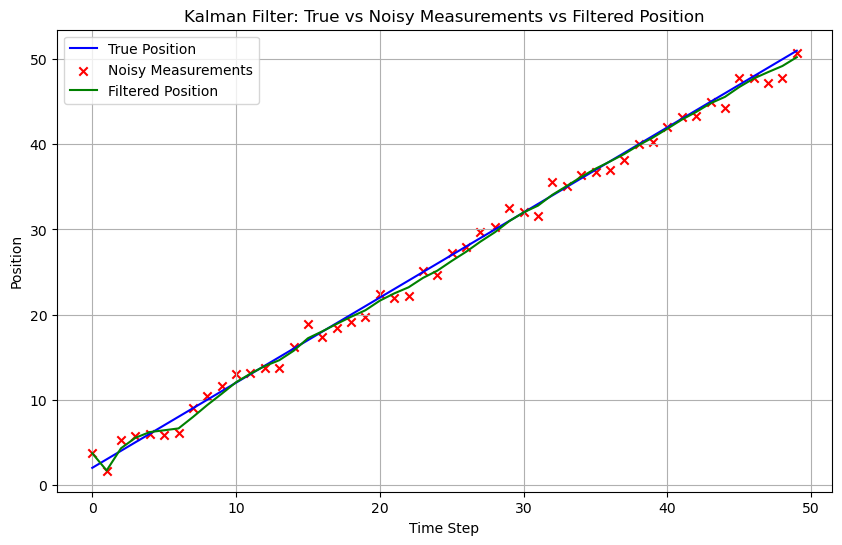

In [319]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(true_positions, label='True Position', color='blue')
plt.scatter(range(len(measurements)), measurements, label='Noisy Measurements', color='red', marker='x')
plt.plot(filtered_positions, label='Filtered Position', color='green')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Kalman Filter: True vs Noisy Measurements vs Filtered Position')
plt.legend()
plt.grid(True)
plt.show()